# (A) Dependencies
- It just need the libraries. There is no further installation dependency.
- You can download and load the dataset via seaborn library.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# (B) Dataset

## Getting the Iris dataset

In [2]:
# Checl Built-in seaborn datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# Download & load the dataset via seaborn lib
df = sns.load_dataset("iris")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Meta Data of Iris Dataset

### Background of dataset
- The data set contains 3 classes of 50 instances each,
    -  where each class refers to a type of iris plant.
- One class is linearly separable from the other 2, 
    - the latter are NOT linearly separable from each other.

### Variable spesifications
Variables of the dataset:

1. 'sepal_length' (cm){Continuous}
2. 'sepal_width' (cm){Continuous}
3. 'petal_length' (cm){Continuous}
4. 'petal_width' (cm){Continuous}
5. class of target variable 'species': {Categorical}
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

## Attributes & Stats of dataset

In [4]:
# Dataset information (record size, variables, non-null counts, dtypes  etc...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Descriptive stats of the dataset
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

In [6]:
# Distribution of target variable's class
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: title={'center': 'Distribution of the target classes'}>

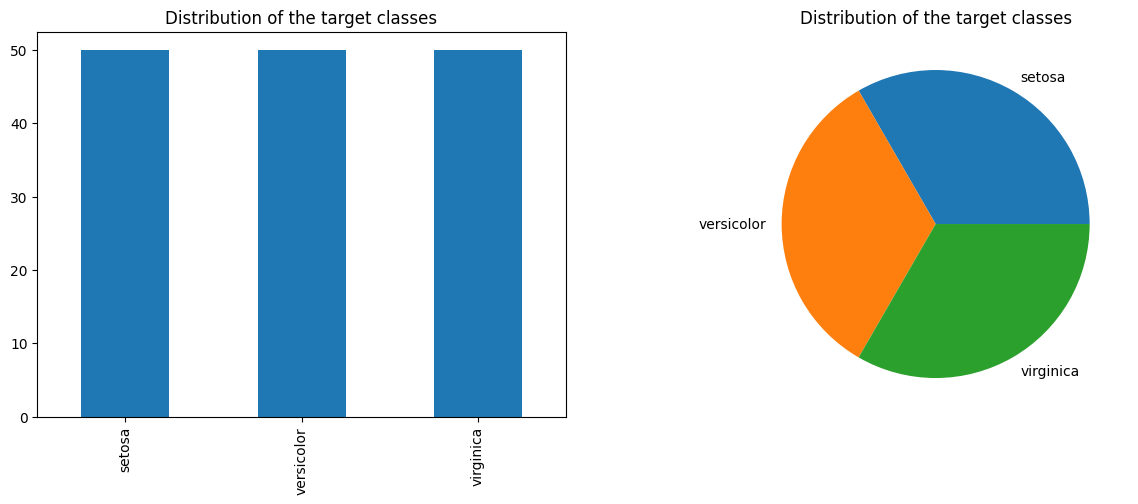

In [7]:
# Distribution of target variable's class
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title("Distribution of the target classes")
df['species'].value_counts().plot.bar()
plt.subplot(1,2,2)
plt.title("Distribution of the target classes")
df['species'].value_counts().plot.pie(label="")

# (C) Pre-processing

## Adjusting data types

### Type Casting on target classes from object to categorical 

In [7]:
df['species'].dtype

dtype('O')

In [8]:
df['species'] = df['species'].astype('category')

In [9]:
df['species'].dtype

CategoricalDtype(categories=['setosa', 'versicolor', 'virginica'], ordered=False)

### Grouping by dtypes
Grouping dataset according to numerical and categorical for further process

In [10]:
df_num = df.select_dtypes(include=["float64","int64"])
df_num.head(0)

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width]
Index: []

In [11]:
df_cat = df.select_dtypes(include=["category"])
df_cat.head(0)

Empty DataFrame
Columns: [species]
Index: []

## Outlier Analysis

### Visual Approach

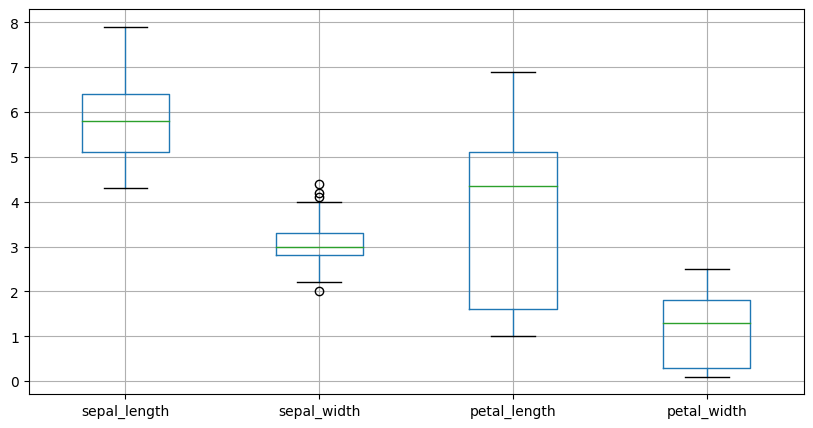

In [12]:
plt.figure(figsize=(10,5));
df.boxplot();

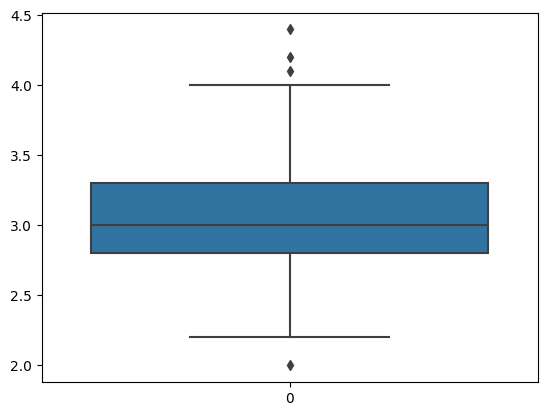

In [13]:
sns.boxplot(df["sepal_width"]);

### IQR approach

#### Calculating IQR

In [14]:
def IQR_calculator(df, ratio=1.5):
    # Calculating the quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR range calculation
    IQR = Q3 -Q1

    # Determinating the boundaries
    lower_threashold = Q1 - ratio * IQR
    higher_threashold = Q3 + ratio *IQR
    
    return IQR, lower_threashold, higher_threashold

In [15]:
IQR, l_th, h_th = IQR_calculator(df, ratio=1.5)
IQR, l_th, h_th

(sepal_length    1.3
 sepal_width     0.5
 petal_length    3.5
 petal_width     1.5
 dtype: float64,
 sepal_length    3.15
 sepal_width     2.05
 petal_length   -3.65
 petal_width    -1.95
 dtype: float64,
 sepal_length     8.35
 sepal_width      4.05
 petal_length    10.35
 petal_width      4.05
 dtype: float64)

### Finding out The outlier values

In [16]:
def find_outlier(df:pd.DataFrame, lower_threashold, higher_threashold)->pd.DataFrame:
    df_num = df.select_dtypes(include=["float64, int64"])
    boolean_outlier_df = (df_num < lower_threashold) | (higher_threashold < df_num)
    return boolean_outlier_df, df_num.columns

In [17]:
# Getting the outlier indexes
is_outlier, num_cols = find_outlier(df, l_th, h_th)
is_outlier

sepal_length  sepal_width  petal_length  petal_width
0           False        False         False        False
1           False        False         False        False
2           False        False         False        False
3           False        False         False        False
4           False        False         False        False
..            ...          ...           ...          ...
145         False        False         False        False
146         False        False         False        False
147         False        False         False        False
148         False        False         False        False
149         False        False         False        False

[150 rows x 4 columns]

In [18]:
is_outlier.sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [19]:
num_cols = df_num.columns
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [20]:
# Getting Outlier values
outlier_values = df[num_cols][is_outlier]
outlier_values.head()

sepal_length  sepal_width  petal_length  petal_width
0           NaN          NaN           NaN          NaN
1           NaN          NaN           NaN          NaN
2           NaN          NaN           NaN          NaN
3           NaN          NaN           NaN          NaN
4           NaN          NaN           NaN          NaN

### Handling outlier
- There are no outliers in the dataset, so no handling process is implemented

## Missing Value

### Finding out the missing values

In [21]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Handling
- There is no missing value in the dataset so no handling process is implemented.

# (D) Exploratory Data Analysis

## Dataset Spesifications

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [24]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

In [25]:
pd.unique(df.select_dtypes(include=["category"]).values.ravel('k'))

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Univariate Analysis

### Target Variable

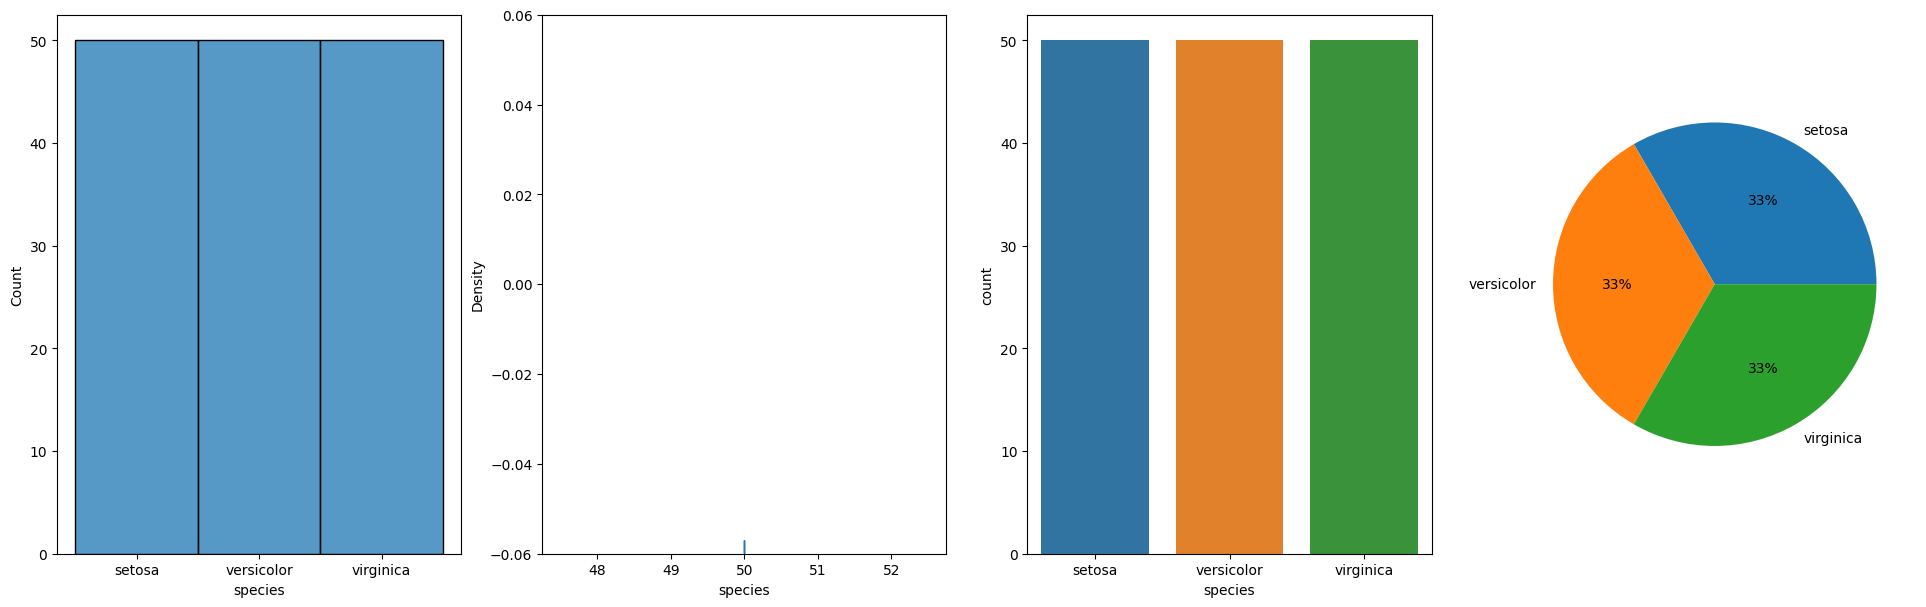

In [26]:
plt.figure(figsize=(24,7))

plt.subplot(1,4,1)
sns.histplot(data=df, x="species");

plt.subplot(1,4,2)
sns.distplot(df["species"].value_counts(), rug=True, hist=False);

plt.subplot(1,4,3)
sns.countplot(data=df, x="species");

plt.subplot(1,4,4)
plt.pie(df["species"].value_counts(), labels=df["species"].unique(), autopct="%.0f%%");

### Feature Variables

#### setting the plotting params

In [27]:
# Extracting the categories
cols, rows = 2, 2
num_cols = df.select_dtypes(exclude='category').columns

#### [histplot] Distributions

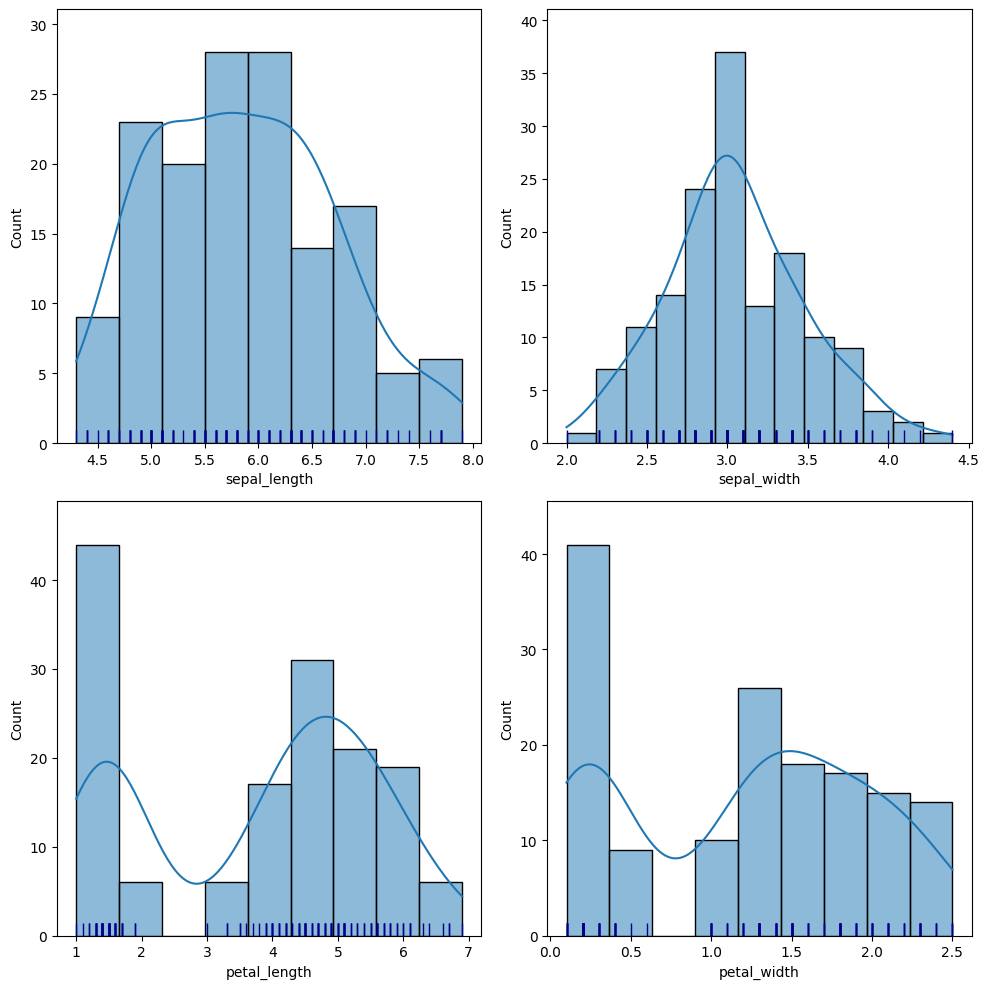

In [28]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

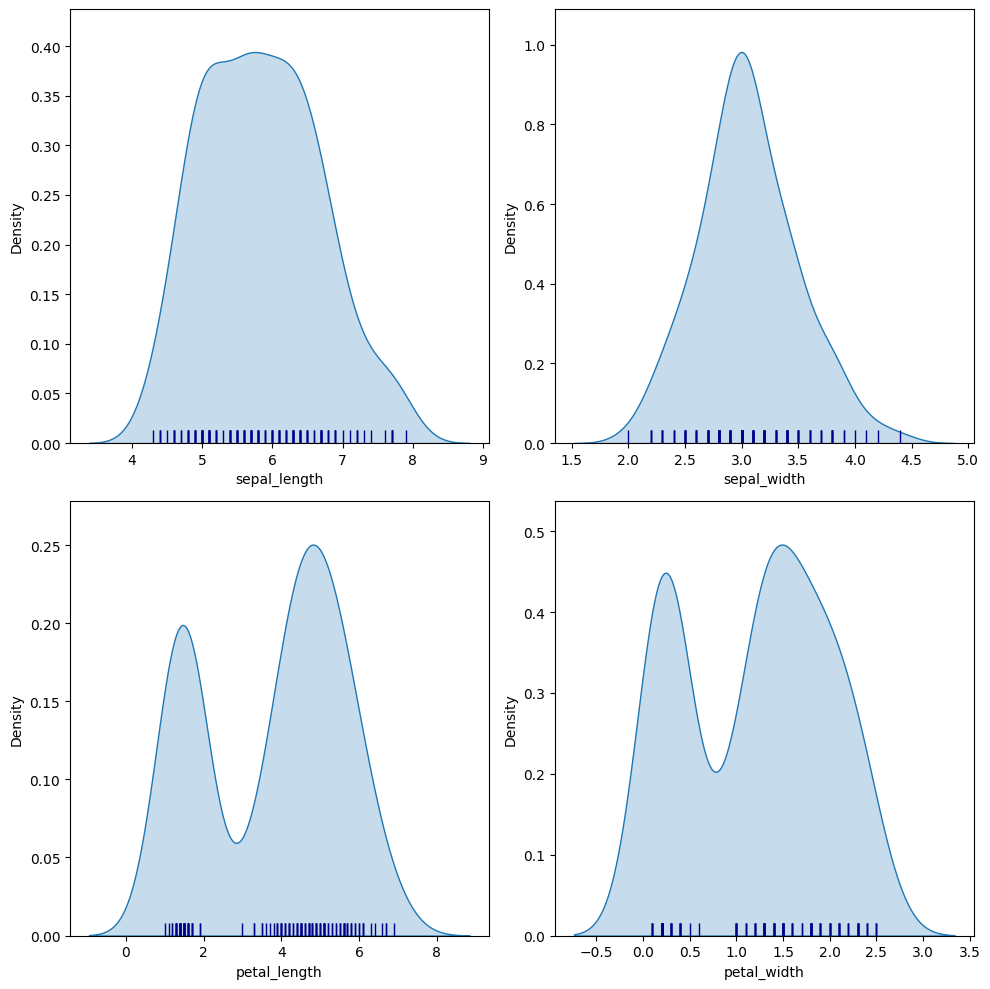

In [29]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x=df[col], data=df ,shade=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

#### [boxplot] Distributions with quartiles (Outlier)

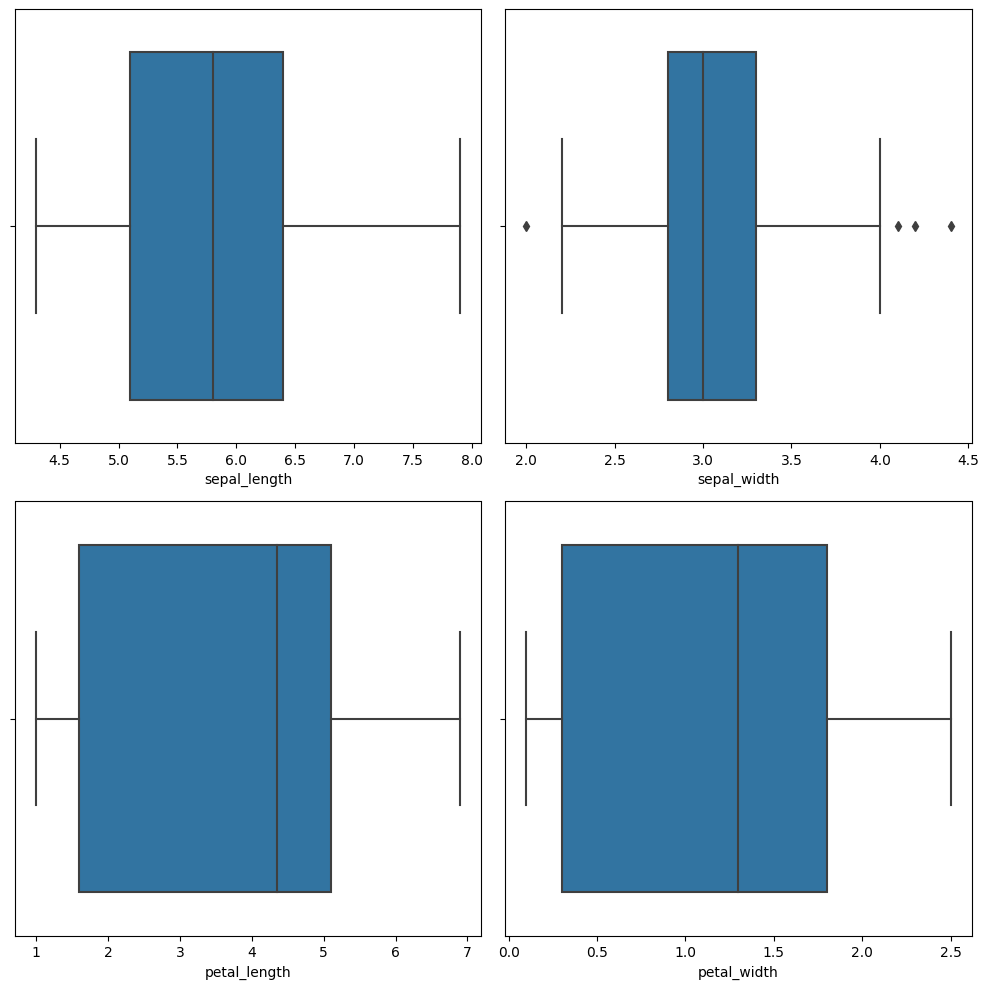

In [30]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

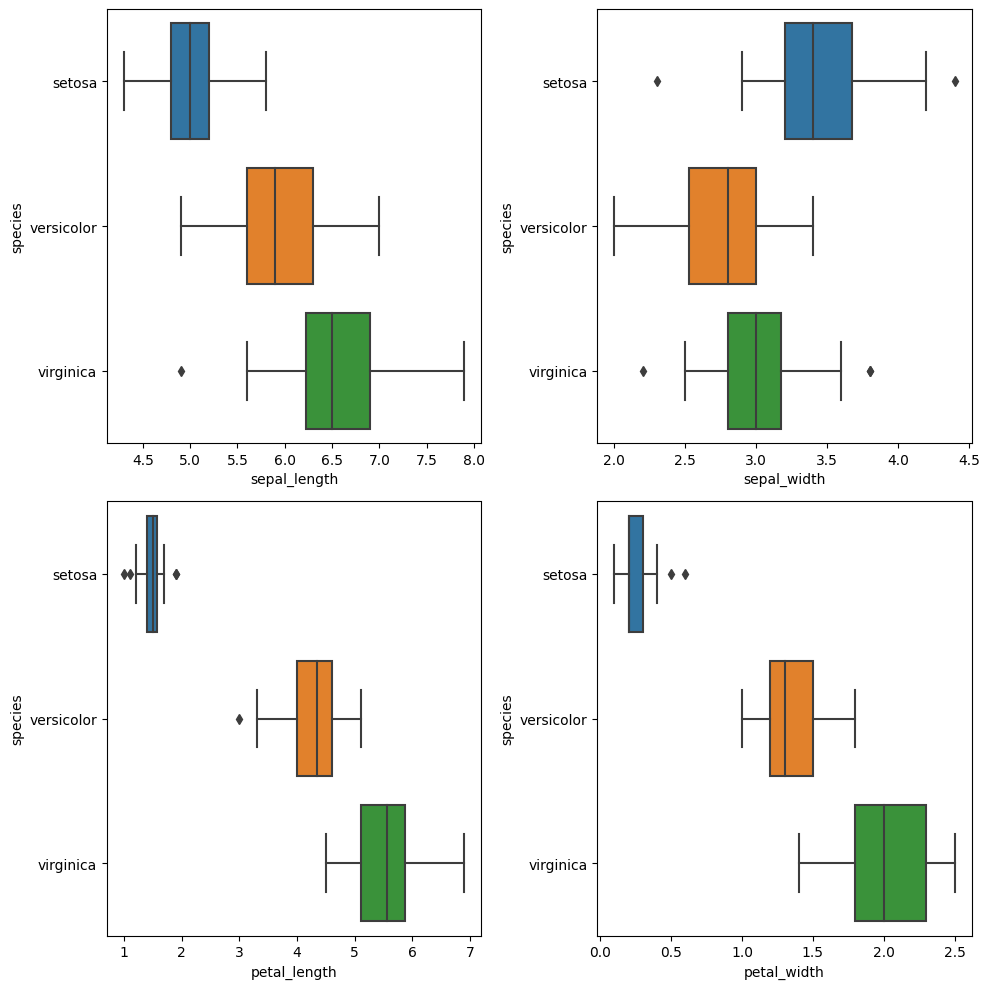

In [31]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], y=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [violinplot] Distributions with quartiles and density

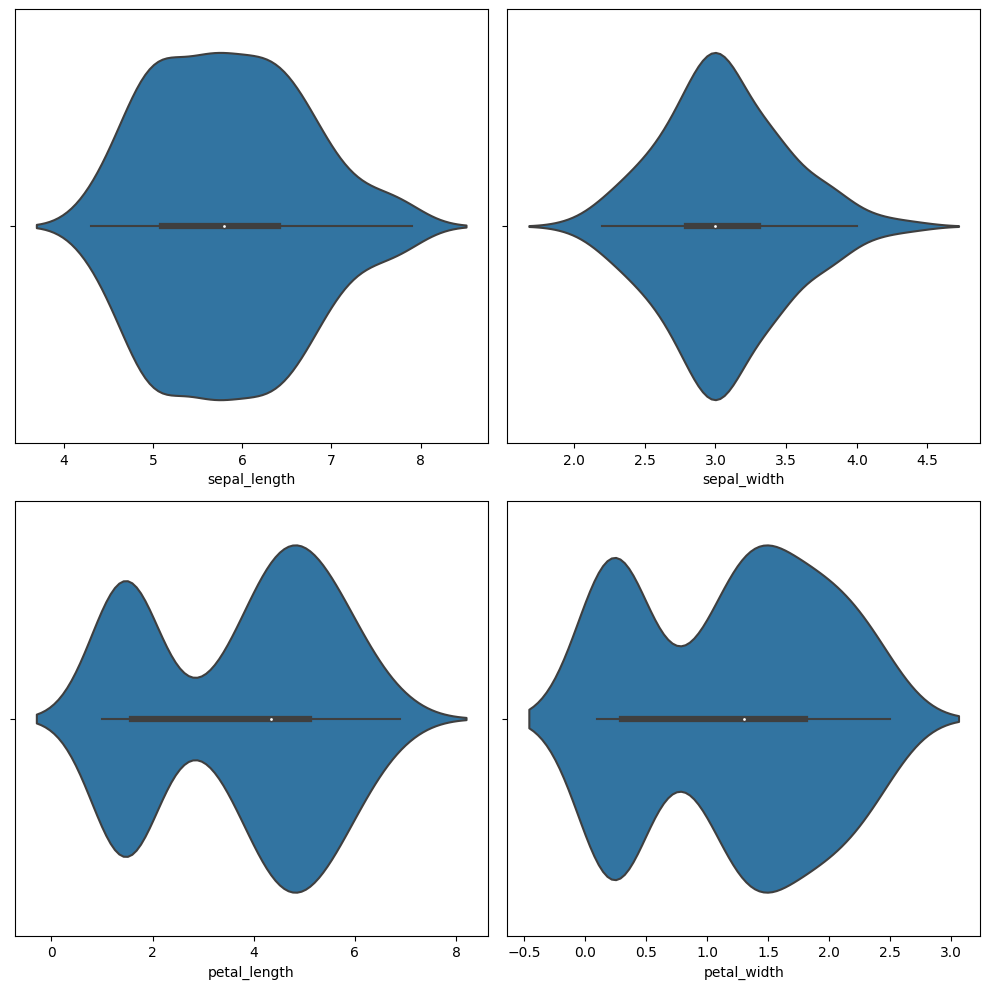

In [32]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # violinplot
    sns.violinplot(x=df[col], show_medians=True, ax=ax)
    
fig.tight_layout()  
plt.show()

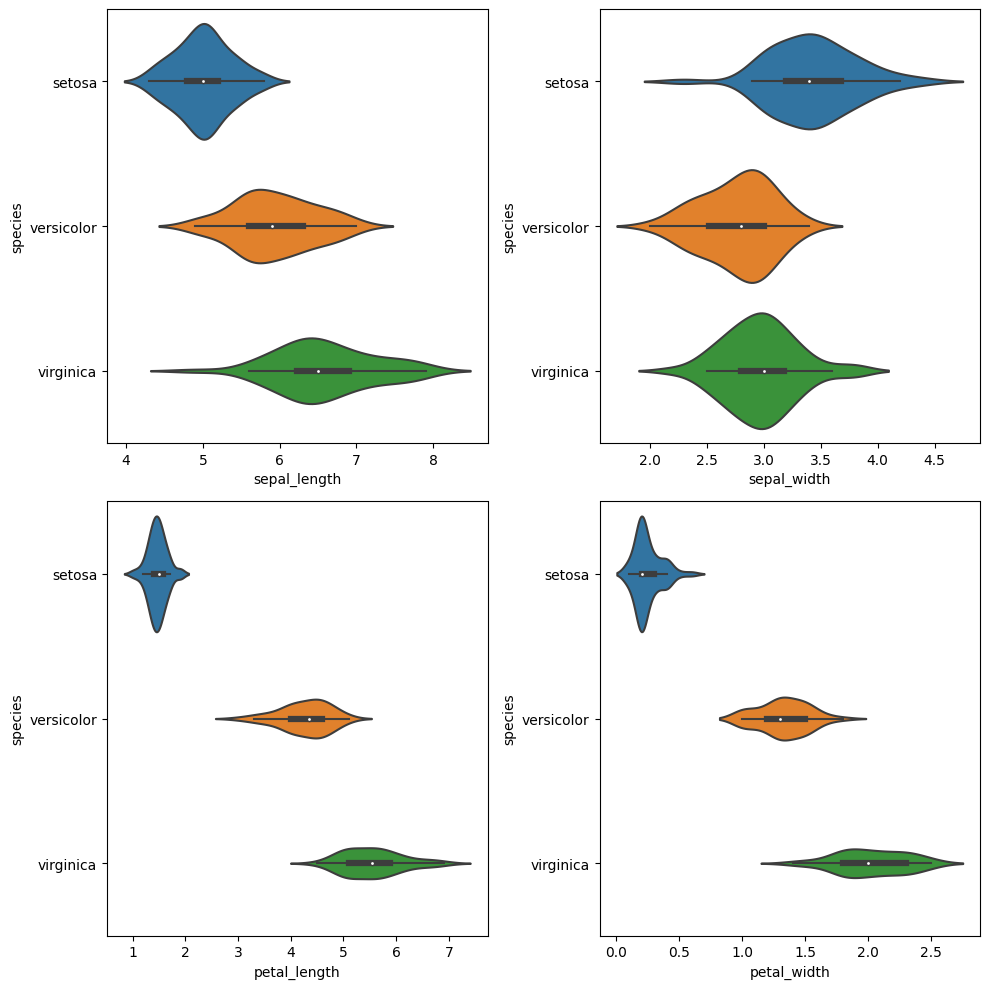

In [33]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # violinplot
    sns.violinplot(x=df[col], y=df["species"], show_medians=True, ax=ax)
    
fig.tight_layout()  
plt.show()

#### [stripplot] spread of the data with stripplot

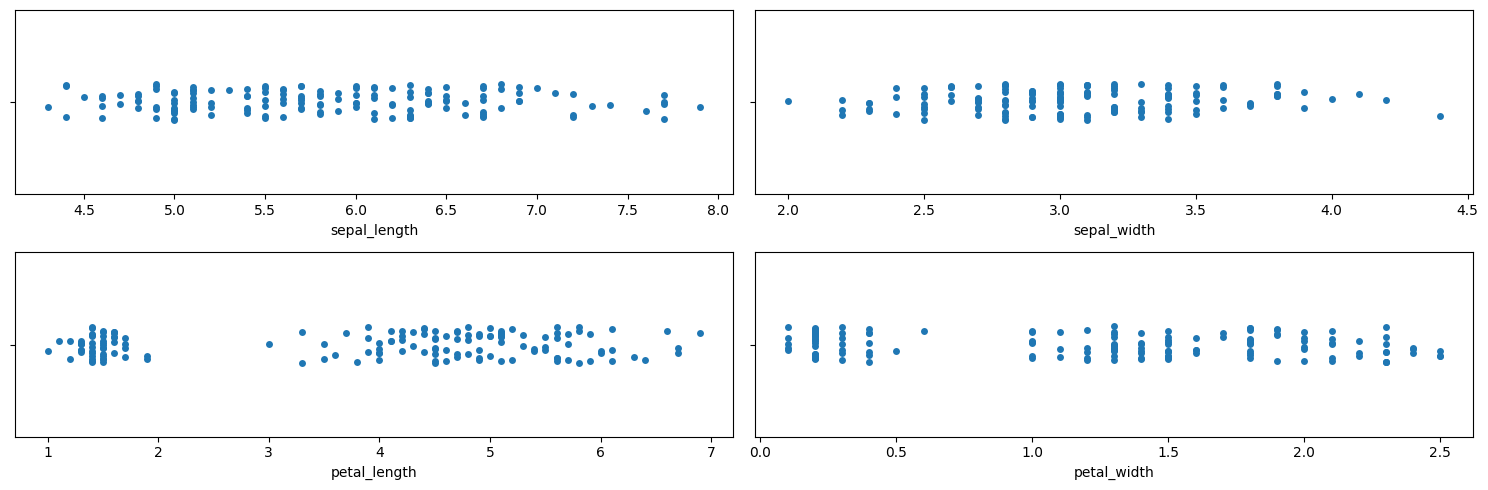

In [34]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # stripplot
    sns.stripplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

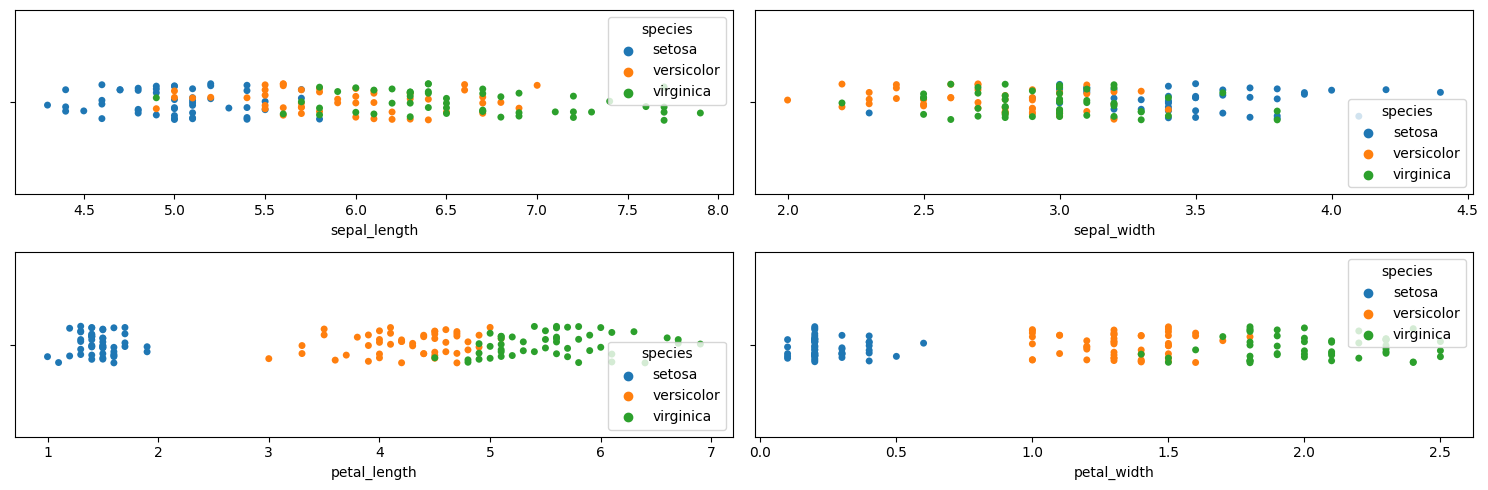

In [35]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # stripplot
    sns.stripplot(x=df[col], hue=df["species"] ,ax=ax)
    
fig.tight_layout()  
plt.show()

#### [swarmplot] spread of the data with stripplot (avoids overlap)

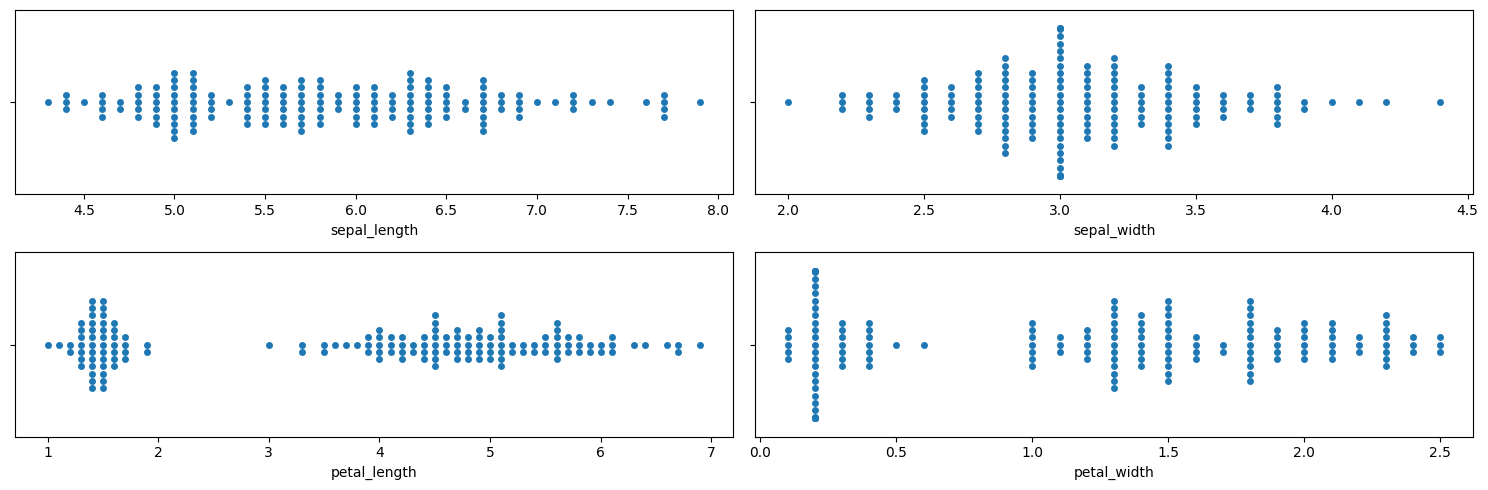

In [36]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # swarmplot
    sns.swarmplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

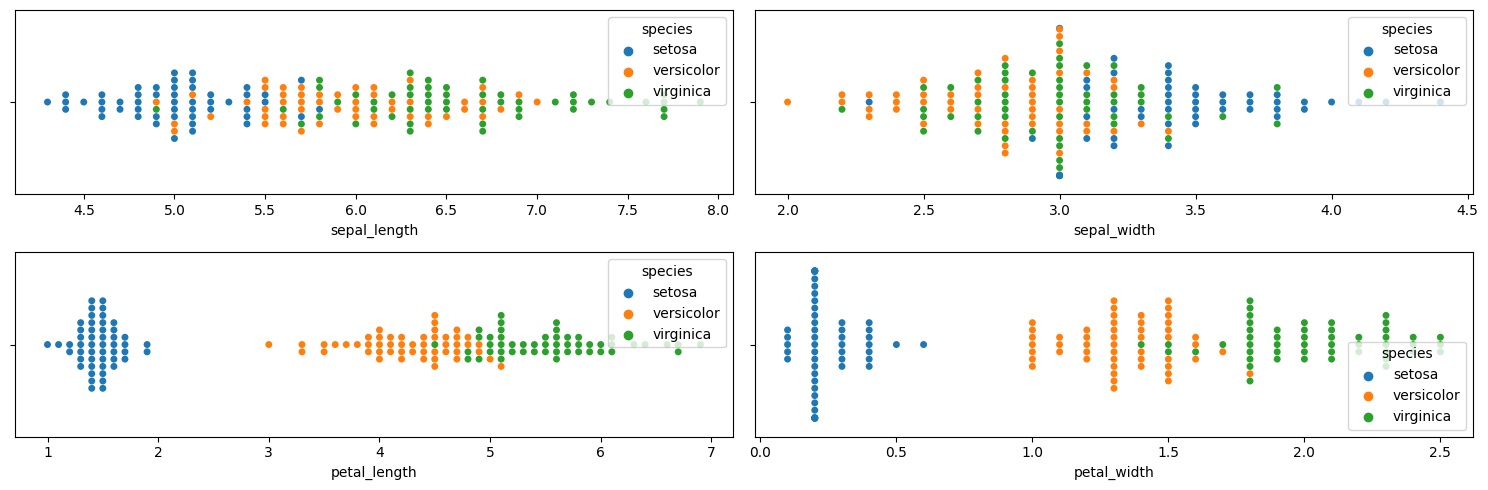

In [37]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # swarmplot
    sns.swarmplot(x=df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [scatterplot] Spread of data 

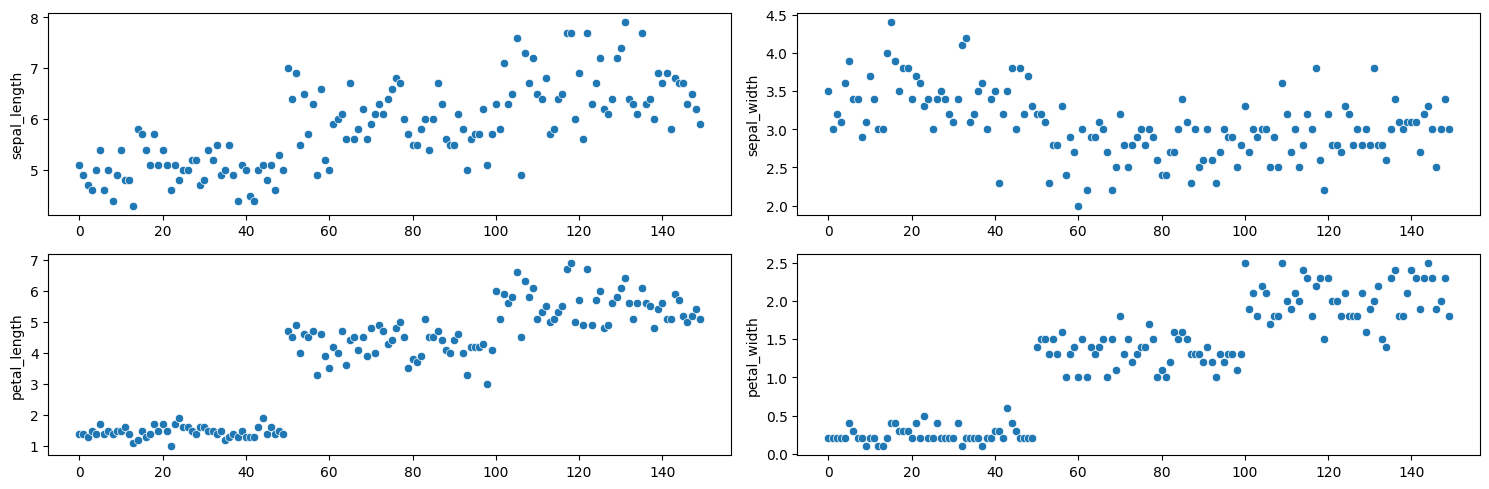

In [38]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # scatterplot
    sns.scatterplot(x = df[col].index, y= df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

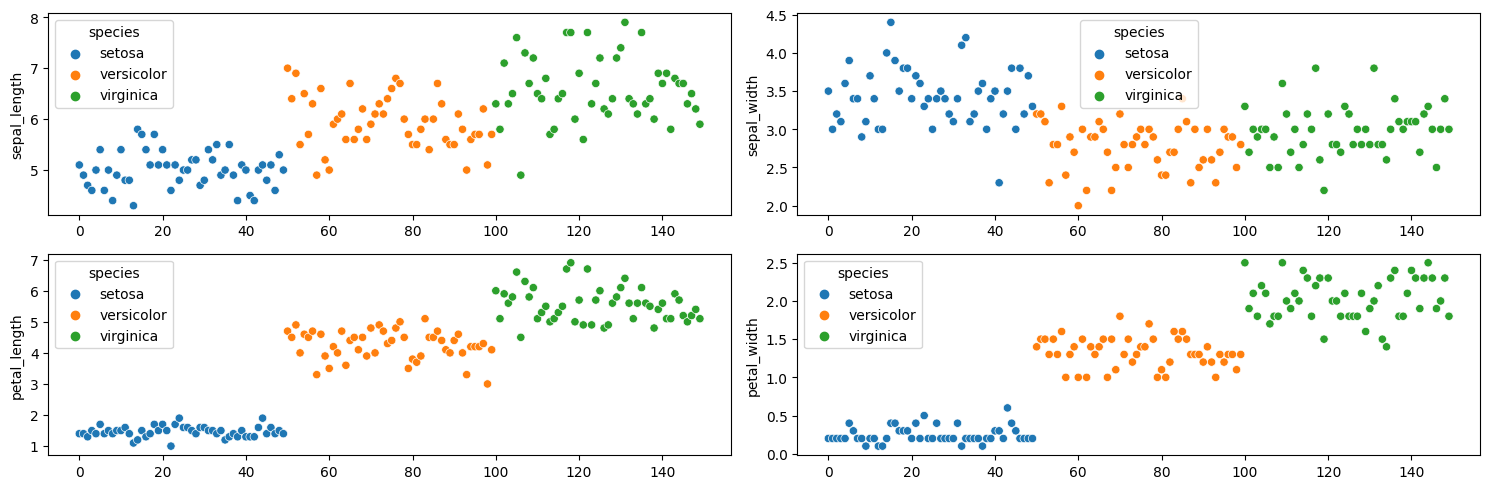

In [39]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)

    sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [lineplot] Trend

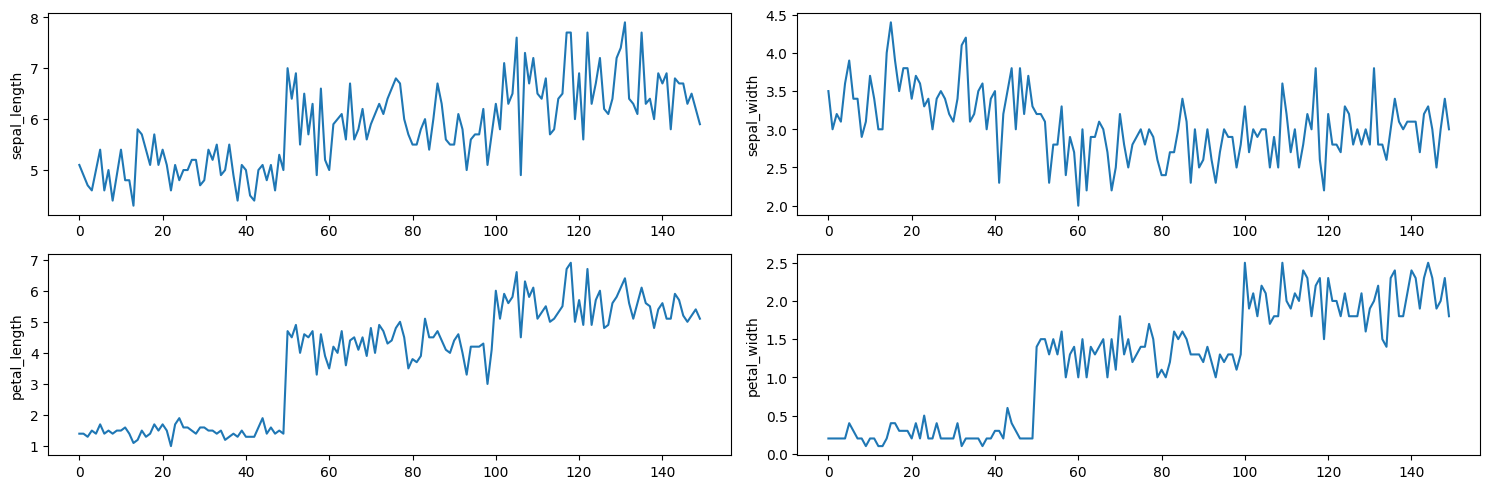

In [40]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.lineplot(x=df[col].index, y=df[col], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

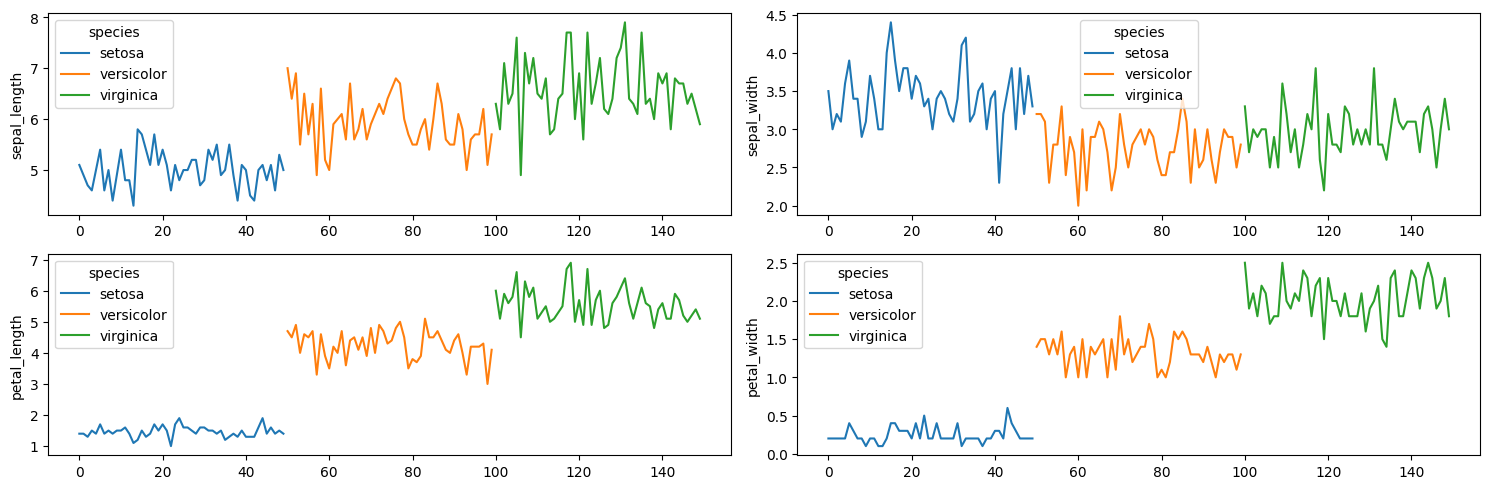

In [41]:
fig = plt.figure(figsize= (15,5))
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.lineplot(x=df[col].index, y=df[col], hue=df["species"], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

## Bivariate & Multivariate Analysis

In [42]:
#sns.JointGrid(df["sepal_length"], df["sepal_width"], hue=df["species"]).plot(sns.scatterplot, sns.histplot);

In [43]:
#sns.JointGrid(df["petal_length"], df["petal_width"], hue=df["species"]).plot(sns.scatterplot, sns.histplot);

In [44]:
# Extracting the categories
cols, rows = 2, 2
num_cols = df.select_dtypes(exclude='category').columns
target_col = "species"

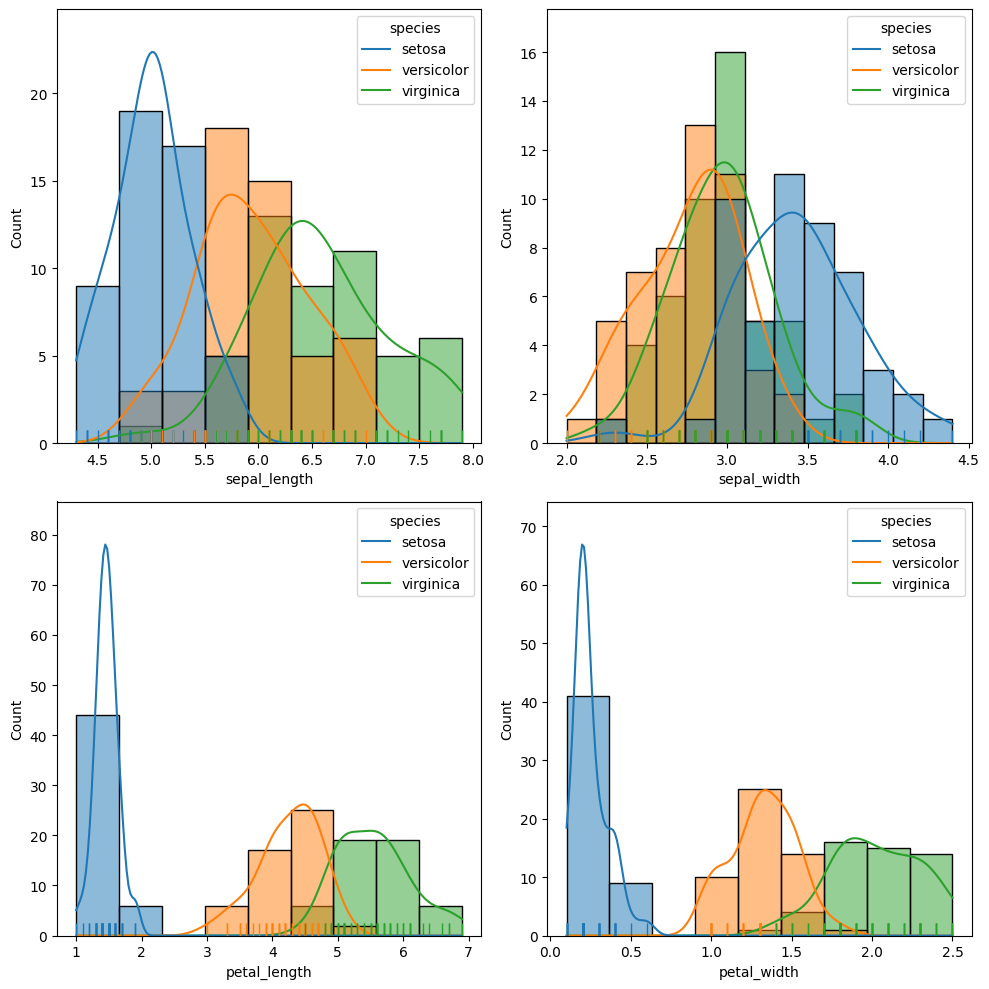

In [45]:
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, hue=target_col, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, hue=target_col, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

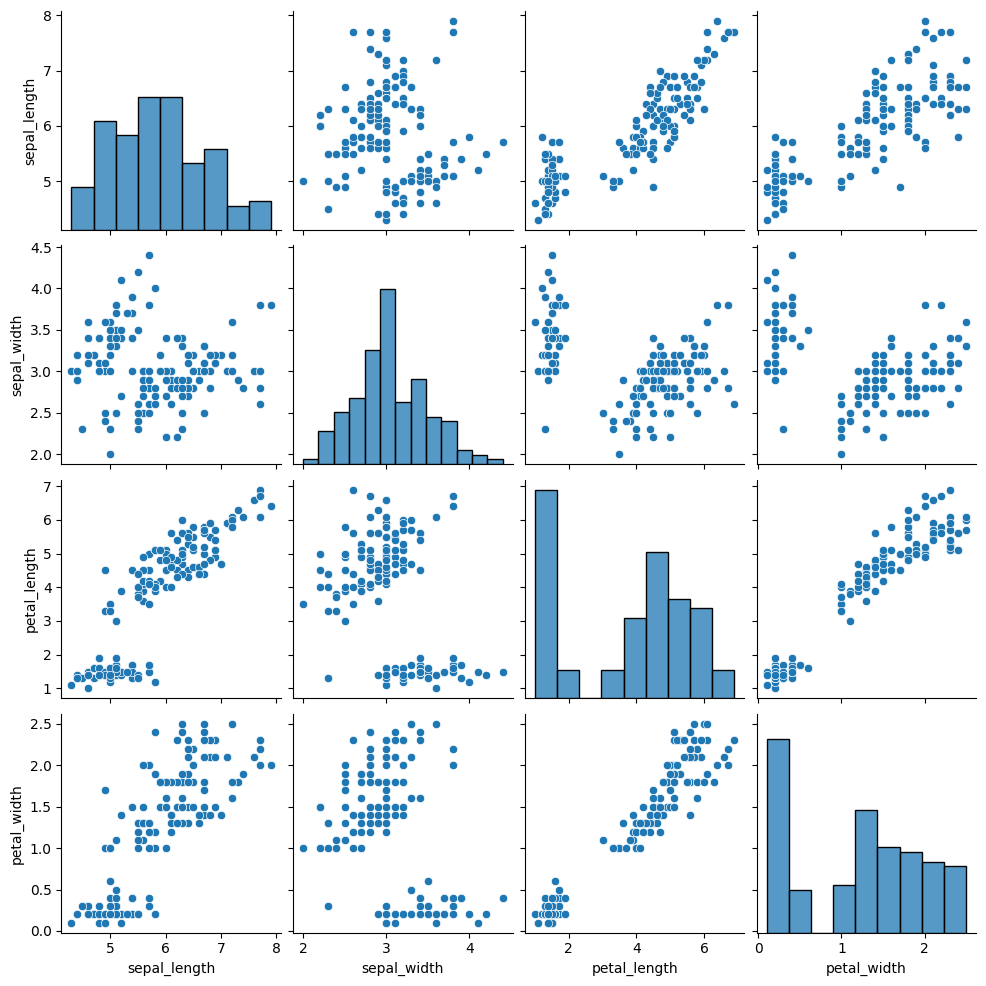

In [46]:
sns.pairplot(df);

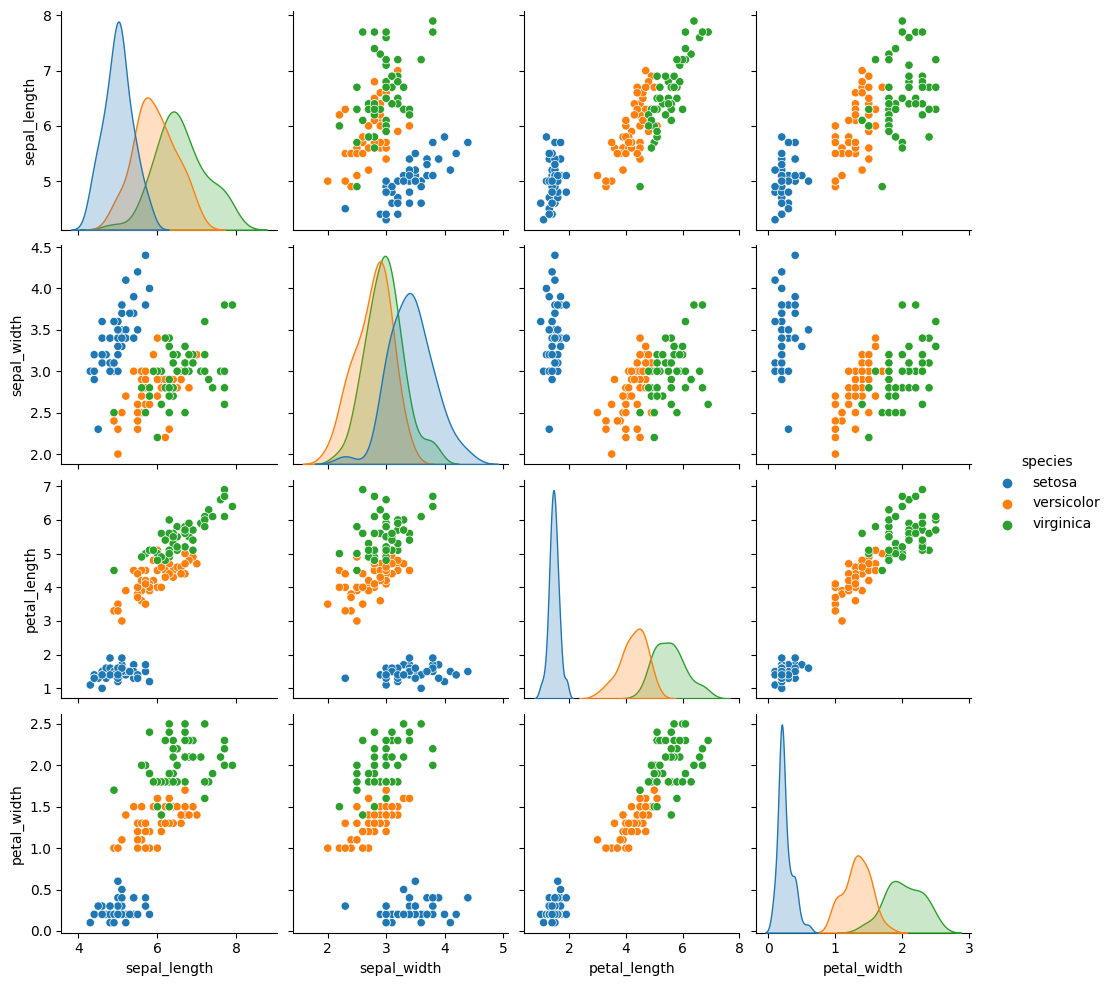

In [47]:
sns.pairplot(df, hue="species");

<Figure size 2000x2000 with 0 Axes>

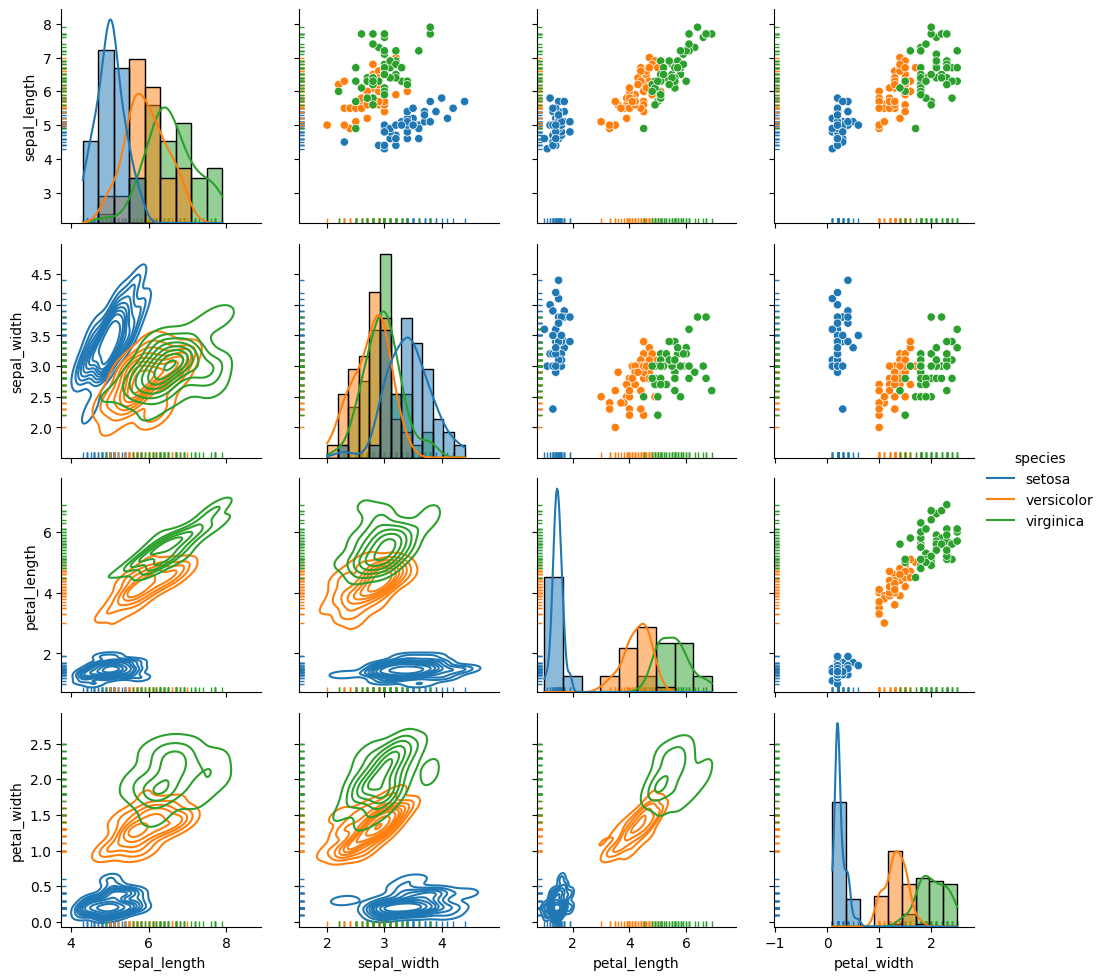

In [48]:
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df, diag_sharey=False, hue="species")
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot)
g.map(sns.rugplot)
g.add_legend();

<Figure size 2000x2000 with 0 Axes>

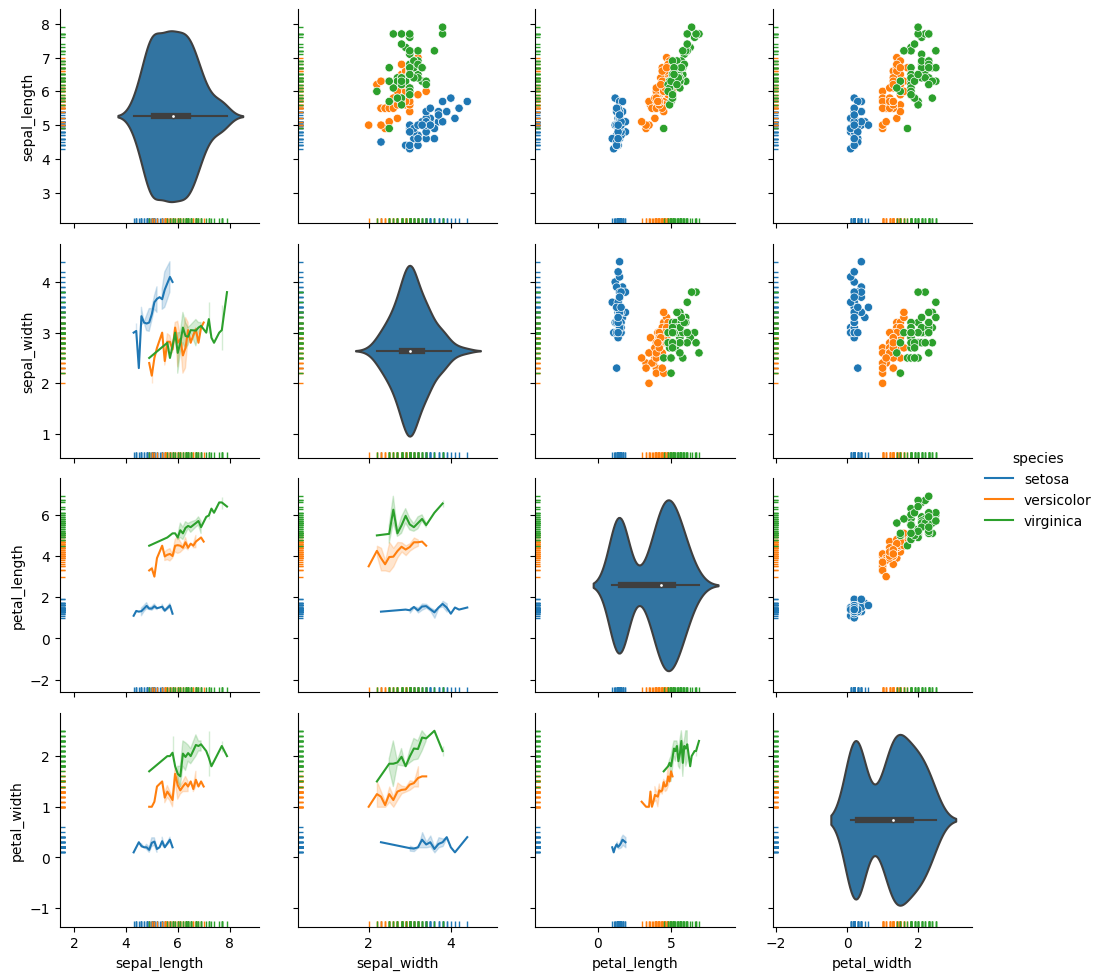

In [49]:
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df, hue="species")
g.map_upper(sns.scatterplot)
g.map_diag(sns.violinplot)
g.map_lower(sns.lineplot)
g.map(sns.rugplot)
g.add_legend();

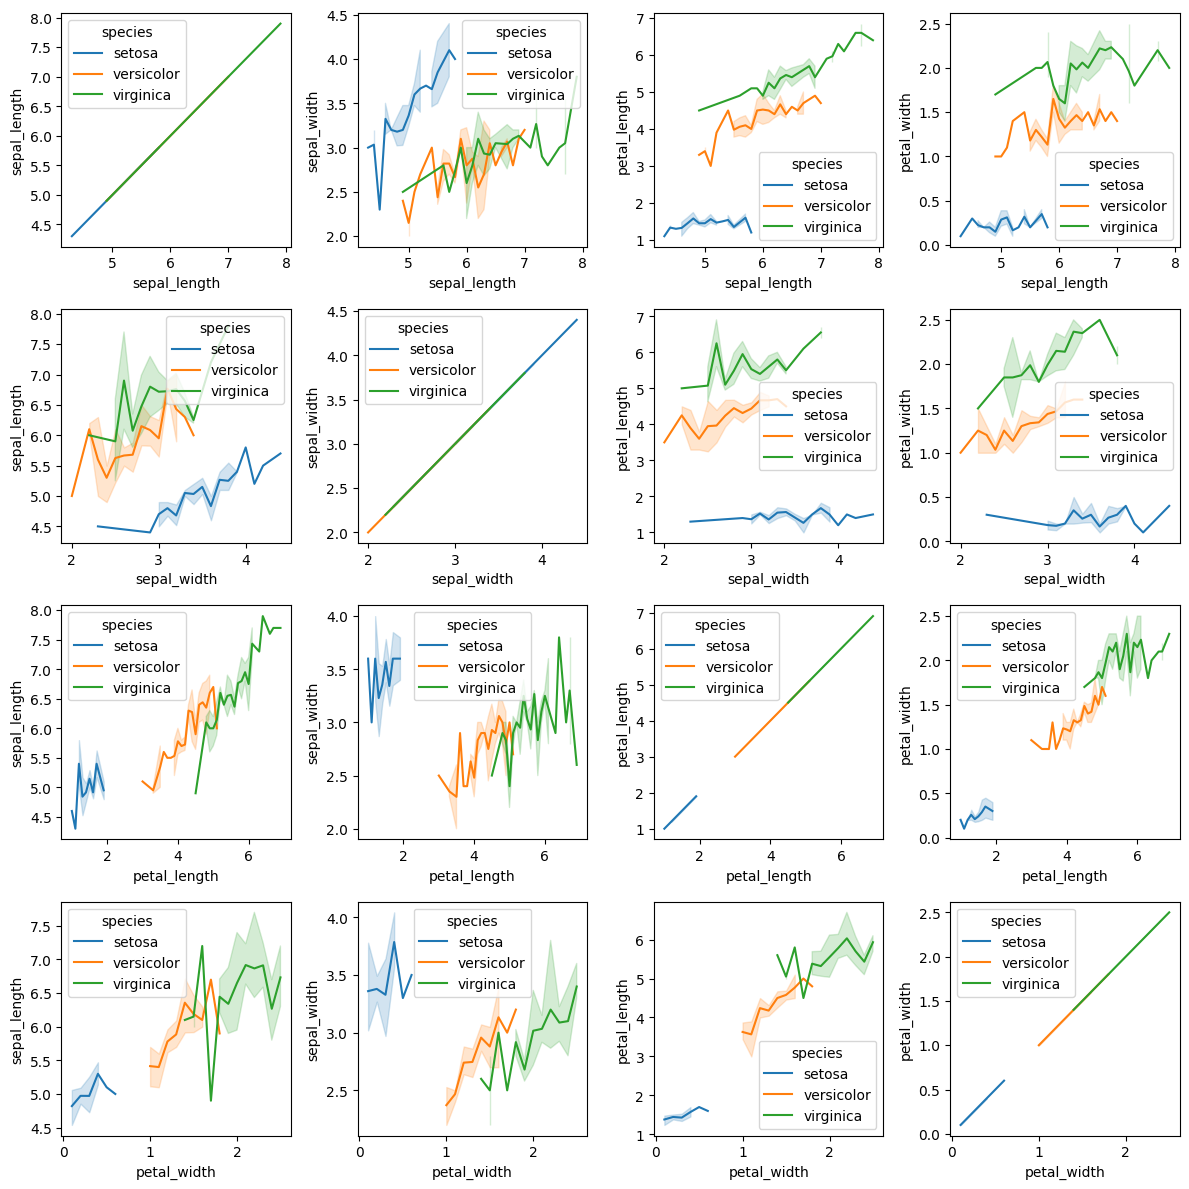

In [50]:
row_size, col_size = len(num_cols), len(num_cols)
fig = plt.figure( figsize=(row_size*3, row_size*3))
for i, row in enumerate(num_cols):
    for j, col in enumerate(num_cols):
        ax=fig.add_subplot(row_size, col_size, (i*col_size)+j+1)
        sns.lineplot(data= df, x=row, y=col, hue="species", ax=ax)
        
fig.tight_layout()  
plt.show()

## Relations

In [51]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

<Axes: >

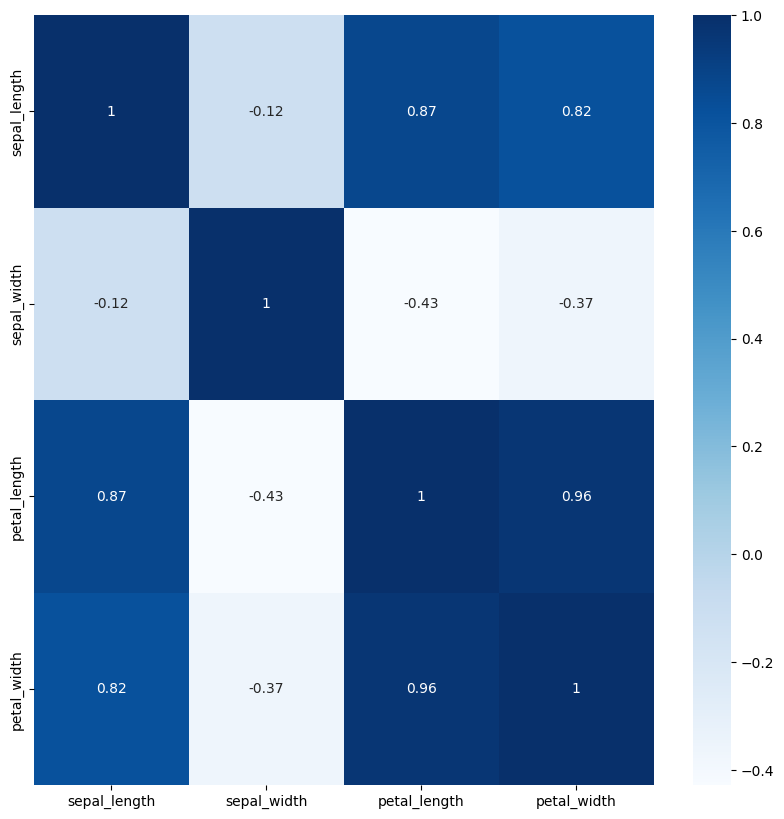

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [53]:
df.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [54]:
# Calculate the covariance between the target and the feature
cov = {  col: [ np.cov(df["species"].cat.codes, df[col])[0,1] ] for col in num_cols }
cov_s = pd.Series(np.squeeze(list(cov.values())), index=cov.keys())
cov_s

sepal_length    0.530872
sepal_width    -0.152349
petal_length    1.372483
petal_width     0.597315
dtype: float64

## Prepare The Data To Training

### Encoding the target variable

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['species'] = le.fit_transform(df['species'])
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

### Determinating the Features and target variable

In [24]:
X = df.drop(columns=['species'])
y = df['species']

### Splitting the dataset

#### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Test Validation Split

In [59]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

# (E) Model Selection (Classic ML models)

## Util Functions
- Utils functions for model tuning

### Greedy Step tune

In [26]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

def greedy_search(model, params:dict, X_train, y_train, cv=10, n_jobs=-1, verbose=2, is_print=False):
  """It tunes params individually step by step . select best value on current step.
  It assumes the params sorted by importance on the model as descending. 
  The important param, second important param, etc.... 
  """
  
  best_params = {}
  for name, values in params.items():
    # Initial params
    best_params[name] = values

    if is_print: print("before:");pprint(best_params);
    
    # create GridSearch&Train 
    cv_model = GridSearchCV(model, best_params, cv=cv, n_jobs=n_jobs, verbose=verbose)
    cv_model.fit(X_train, y_train)

    # Update the param
    best_params[name] = [cv_model.best_params_[name]]
    
    if is_print: print("after:");pprint(best_params);print("-"*25, end="\n\n");

  return cv_model, cv_model.best_estimator_, best_params

### Model Tuner

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


def gen_clf_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common classification metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)

  clf_metrics = {
            "accuracy":accuracy_score(y_test, y_pred),
            "precision" : precision_score(y_test, y_pred, average="micro"),
            "recall": recall_score(y_test, y_pred, average="micro"),
            "f1_score": f1_score(y_test, y_pred, average="micro"),
            "clf_report":classification_report(y_test, y_pred, output_dict=True)
  }

  if return_y_data:
    clf_metrics["y_pred"] = y_pred
    clf_metrics["y_test"] = y_test
            
  
  return clf_metrics

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error

def gen_reg_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common regression metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)


  reg_metrics = {
      "MaxError": np.max(y_test - y_pred),
      "MeanAbsoluteError": median_absolute_error(y_test, y_pred),
      "MeanAbsolutePercentageError": np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
      "MSE": mean_squared_error(y_test, y_pred),
      "RMSE": mean_squared_error(y_test, y_pred, squared=False),
      "MAE": mean_absolute_error(y_test, y_pred),
      "R2":r2_score(y_test, y_pred),
      "ExplainedVariance":explained_variance_score(y_test, y_pred)
  }

  if return_y_data:
    reg_metrics["y_pred"] = y_pred
    reg_metrics["y_test"] = y_test


  return reg_metrics

In [29]:
import pandas as pd
def tune_models(tuners, X_train, y_train, X_test, y_test, is_clf, cv=10, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
    # Tuning
    cv_model, tuned_model, best_params = greedy_search(model, params, X_train, y_train, cv=cv)
    
    # predicting
    y_pred = tuned_model.predict(X_test)
    metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
    metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

    # Generating results
    cur_results = {
        "tune_results": {
            "cv_model":cv_model,
            "tuned_model":tuned_model,
            "best_params":best_params,
        },
        "metric_results": metric_results
    }
    
    results[name] = cur_results
    metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T


In [30]:
import pandas as pd
def tune_linear_cv_models(tuners, X_train, y_train, X_test, y_test, is_clf, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
      # Tuning
      tuned_model = model(**params)
      tuned_model.fit(X_train, y_train)
      
      # predicting
      y_pred = tuned_model.predict(X_test)
      metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
      metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

      # Generating results
      cur_results = {
          "tune_results": {
              "tuned_model":tuned_model,
              "best_params":tuned_model.get_params(True) ,#best_params_,
          },
          "metric_results": metric_results
      }
      
      results[name] = cur_results
      metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T

### Learning Curve Plotter

In [31]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, name, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize=(20,20)):

    # checking the params
    if ylim is not None: plt.ylim(*ylim)
    
    # pre-declerations
    orange, blue = "#ff9124", "#2492ff"

    # Extracting the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Extracting the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # calculating params    
    tra_left_edge = train_scores_mean - train_scores_std
    tra_right_edge = train_scores_mean + train_scores_std

    test_left_edge = test_scores_mean - test_scores_std
    test_right_edge = test_scores_mean + test_scores_std

    # transparent plot for confidence value range
    plt.fill_between(train_sizes, tra_left_edge, tra_right_edge, alpha=0.1, color=orange)
    plt.fill_between(train_sizes, test_left_edge, test_right_edge, alpha=0.1, color=blue)
    
    # Plotting as point
    plt.plot(train_sizes, train_scores_mean, 'o-', color=orange, label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=blue, label="Cross-validation score")
    
    # Configurating the plottings
    plt.title(f"{name} Learning Curve", fontsize=14)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")

In [32]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

def get_learning_curve_stats(clfs, X_train, y_train, cv, model_size, rs, cs, figsize, ylim):

  plt.figure(figsize=figsize)
  # EXtracting the learning curve and validation metrics
  best_models_cross_val_preds, roc_auc_scores = {}, {}
  for i, (name, model) in enumerate(clfs.items()):

    # Training with best models again (the best params already saved inside) for visualizate the duration.
    plt.subplot(rs, cs, i+1)
    print(f"{i}.turn [{name}], plotting learning curve")
    plot_learning_curve(model, name, X_train, y_train, ylim, cv=cv, n_jobs=-1, figsize=figsize) 

    # validating the trained models
    #print(f"{i}.turn, cross_validation")
    #method = "decision_function" if name in ["loj_reg", "svc"] else "predict"
    #best_models_cross_val_preds[name]  = cross_val_predict(model, X_train, y_train, cv=5, method=method)

    # Displating the roc scores
    #print(f"{i}.turn, roc_auc_scores")
    #roc_auc_scores[name] = roc_auc_score(y_train, best_models_cross_val_preds[name])
    #print(f'{name:<20}: ',roc_auc_scores[name])

  return plt.gcf()#, best_models_cross_val_preds#, roc_auc_scores

## (1) Linear Models

#### Hyperparams

In [33]:
lin_params = {
    'fit_intercept': [True, False],
    #'normalize': [True, False],
    'copy_X': [True, False],
}
from sklearn.linear_model import LinearRegression
linear_reg = [LinearRegression(), lin_params]

In [34]:
lasso_params = {
    "alphas": np.logspace(-4, 0, 100),
    #"cv": [3, 5, 10],
    #"normalize": True,
    #"tol": [1e-4, 1e-3, 1e-2]
}
from sklearn.linear_model import LassoCV
l1_reg = [LassoCV, lasso_params] 

In [35]:
ridge_params = {
    "alphas": (10**np.linspace(10,-2,100))*0.5,
    "scoring":"neg_mean_squared_error",
    #"normalize": True
}

from sklearn.linear_model import RidgeClassifierCV 
l2_reg = [RidgeClassifierCV, ridge_params]

In [36]:
ElasticNet_params = {
    "alphas": np.logspace(-4, 0, 100),
    #"cv": 10, #[3, 5, 10],
    #"normalize": True#[True, False],
    #"tol": [1e-4, 1e-3, 1e-2]
}

from sklearn.linear_model import ElasticNetCV 
enet_reg = [ElasticNetCV, ElasticNet_params]

In [37]:
linear_cv_tuners = {
    "l1_reg":l1_reg,
    "l2_reg":l2_reg,
    "enet_reg":enet_reg
}
linear_tuners = {
    "lin_reg":linear_reg,
    #**linear_cv_tuners
}

#### Tuning Demostration

In [38]:
lin_results, lin_metric_summary = tune_linear_cv_models(linear_cv_tuners, X_train, y_train, X_test , y_test, is_clf=False, is_round=True) # X_train_us, y_train_us, X_test_us, y_test_us,

In [39]:
list(lin_results.keys())

['l1_reg', 'l2_reg', 'enet_reg']

In [40]:
lin_metric_summary

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError       MSE  \
l1_reg         1.0                0.0                     9.523810  0.100000   
l2_reg         1.0                0.0                    14.285714  0.133333   
enet_reg       1.0                0.0                     9.523810  0.100000   

              RMSE       MAE        R2  ExplainedVariance  
l1_reg    0.316228  0.100000  0.841828           0.843585  
l2_reg    0.365148  0.133333  0.789104           0.789104  
enet_reg  0.316228  0.100000  0.841828           0.843585

In [41]:
from pprint import pprint
pprint(lin_results)

{'enet_reg': {'metric_results': {'ExplainedVariance': 0.8435852372583479,
                                 'MAE': 0.1,
                                 'MSE': 0.1,
                                 'MaxError': 1,
                                 'MeanAbsoluteError': 0.0,
                                 'MeanAbsolutePercentageError': 9.523809523809524,
                                 'R2': 0.8418277680140598,
                                 'RMSE': 0.31622776601683794},
              'tune_results': {'best_params': {'alphas': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-04, 7.74263683e-04, 8.49753436e-04,
       9.32603347e-04, 1.02353102e-03, 1.

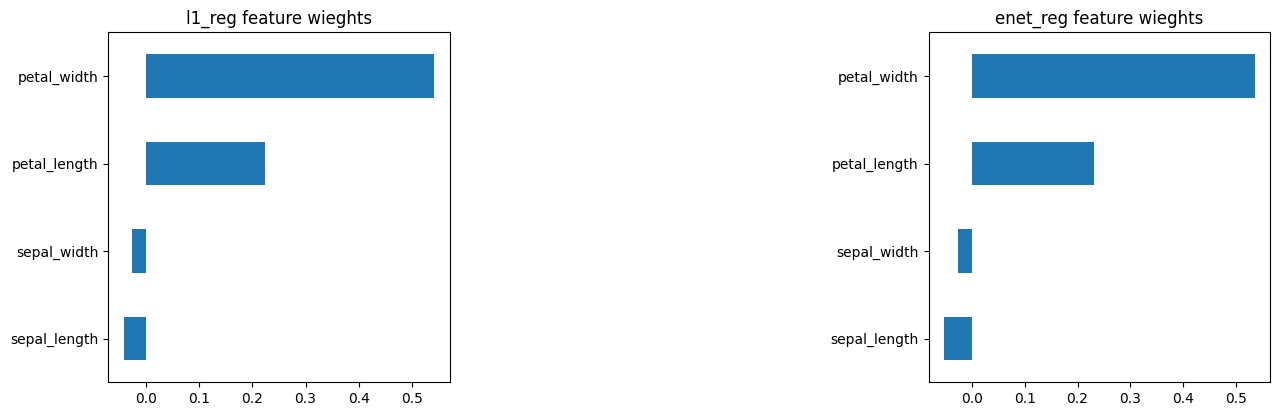

In [42]:
size = len(lin_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*5, rs*5))
lin_models = {}
for i, model_name in enumerate(lin_results.keys()):

  cur_model = lin_results[model_name]["tune_results"]["tuned_model"]
  lin_models[model_name] = cur_model
  
  if model_name not in ["l2_reg"]:
    plt.subplot(rs,cs,i+1)
    pd.Series(cur_model.coef_, X_train.columns).sort_values().plot(kind="barh")
    plt.title(f"{model_name} feature wieghts")

0.turn [l1_reg], plotting learning curve
1.turn [l2_reg], plotting learning curve
2.turn [enet_reg], plotting learning curve


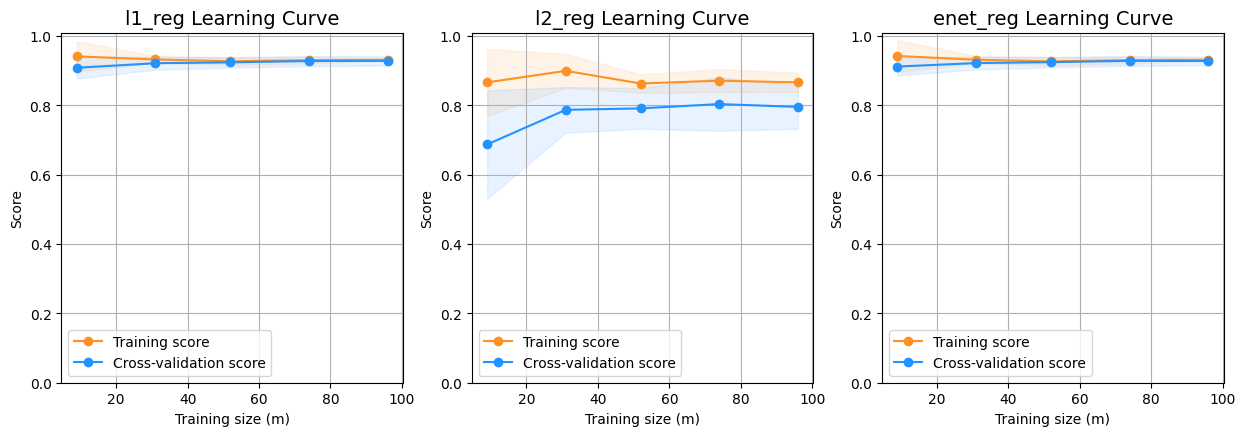

In [43]:
# Example Usage
model_size = len(lin_models)
rs, cs = (model_size//3+1, 3 ) if model_size >= 3 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*5,rs*5),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(lin_models, X_train, y_train,  **lcs_params)

In [44]:
lin_reg_results, lin_reg_metric_summary = tune_models(linear_tuners, X_train, y_train, X_test , y_test, is_clf=False, is_round=True)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [45]:
list(lin_reg_results.keys())

['lin_reg']

In [46]:
lin_reg_metric_summary

ExplainedVariance       MAE       MSE  MaxError  MeanAbsoluteError  \
lin_reg           0.894552  0.066667  0.066667       1.0                0.0   

         MeanAbsolutePercentageError        R2      RMSE  
lin_reg                     7.142857  0.894552  0.258199

In [47]:
from pprint import pprint
pprint(lin_reg_results)

{'lin_reg': {'metric_results': {'ExplainedVariance': 0.8945518453427065,
                                'MAE': 0.06666666666666667,
                                'MSE': 0.06666666666666667,
                                'MaxError': 1,
                                'MeanAbsoluteError': 0.0,
                                'MeanAbsolutePercentageError': 7.142857142857142,
                                'R2': 0.8945518453427065,
                                'RMSE': 0.2581988897471611},
             'tune_results': {'best_params': {'copy_X': [True],
                                              'fit_intercept': [False]},
                              'cv_model': GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [False]},
             verbose=2),
                              'tuned_model': LinearRegression(fit_intercept=False)}}}


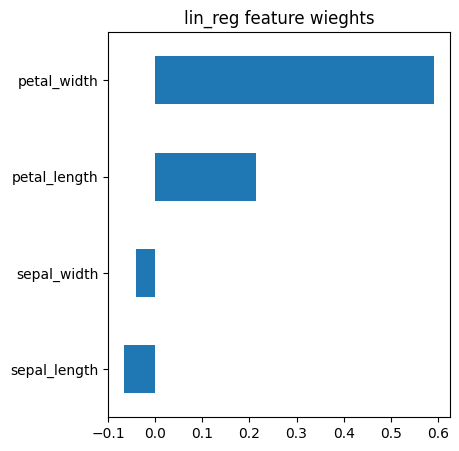

In [48]:
size = len(lin_reg_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*5, rs*5))
lin_reg_models = dict()
for i, model_name in enumerate(lin_reg_results.keys()):

  cur_model = lin_reg_results[model_name]["tune_results"]["tuned_model"]
  lin_reg_models[model_name] = cur_model

  plt.subplot(rs,cs,i+1)
  pd.Series(cur_model.coef_, X_train.columns).sort_values().plot(kind="barh")
  plt.title(f"{model_name} feature wieghts")

0.turn [lin_reg], plotting learning curve


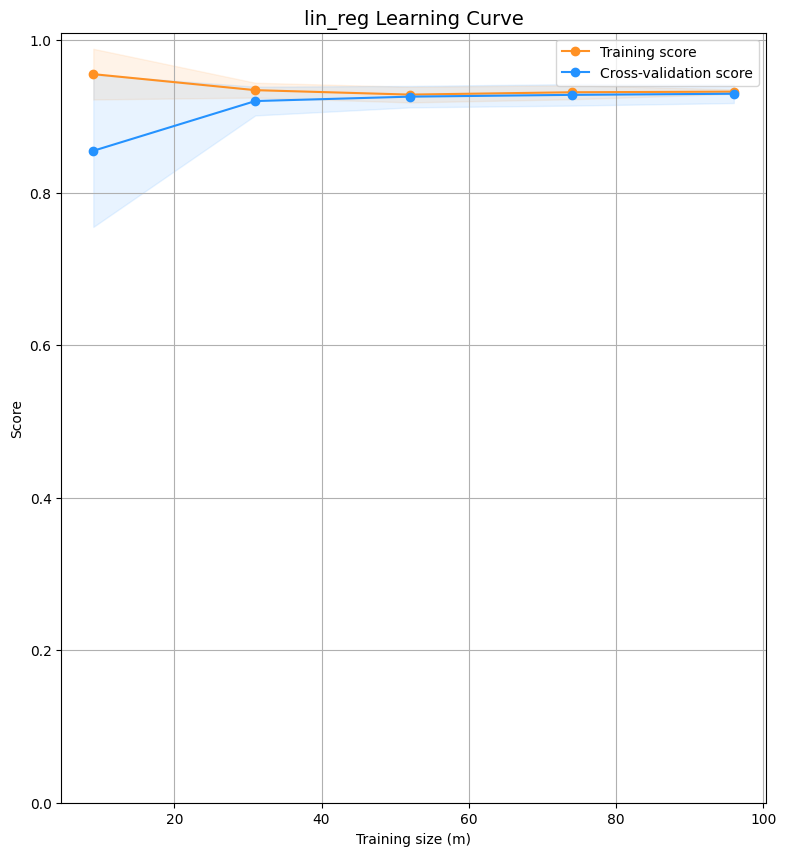

In [49]:
# Example Usage
model_size = len(lin_reg_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(lin_reg_models, X_train, y_train,**lcs_params)

## (2) Non-Linear Models 

#### Hyperparams

In [50]:
loj_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'fit_intercept': [True, False],
    'intercept_scaling': [0.5, 1, 2]
}
from sklearn.linear_model import LogisticRegression
loj_reg = [LogisticRegression(), loj_params]

In [51]:
nb_params = {
    "priors": [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]],
    "var_smoothing":  np.linspace(1e-6, 1e-12, 10)
}
from sklearn.naive_bayes import GaussianNB
nb = [GaussianNB(), nb_params]

In [52]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2, 3, 4, 5],
}
from sklearn.neighbors import KNeighborsClassifier
knn = [KNeighborsClassifier() , knn_params]

In [53]:
svc_params = {
    'C': np.logspace(-3, 3, 7),
    #'kernel': ["linear", "rbf"], # ['linear', 'poly', 'rbf', 'sigmoid'],
    #'degree': [2, 3, 4, 5],
    #'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    #'coef0': [-1, 0, 1],
    #'shrinking': [True, False],
    #'probability': [True, False],
    #'tol': [1e-3, 1e-4, 1e-5],
    #'max_iter': [-1, 1000, 10000, 100000],
    #"class_weight": [None, "balanced"]
}
from sklearn.svm import SVC
svc = [SVC() , svc_params]

In [54]:
dt_params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": [None, "auto", "log2"],
    "class_weight": [None, "balanced"]
}
from sklearn.tree import DecisionTreeClassifier
dt = [DecisionTreeClassifier() , dt_params]

In [55]:
non_linear_tuners = {
    "loj_reg":loj_reg,
    "nb_params":nb,
    "knn":knn,
    "svc":svc,
    "dt":dt
}

#### Tuning Demostration



In [56]:
non_lin_results, non_lin_metric_summary = tune_models(non_linear_tuners, X_train, y_train, X_test , y_test, is_clf=True)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for e

In [57]:
list(non_lin_results.keys())

['loj_reg', 'nb_params', 'knn', 'svc', 'dt']

In [58]:
non_lin_metric_summary

accuracy precision    recall  f1_score  \
loj_reg    0.966667  0.966667  0.966667  0.966667   
nb_params       0.9       0.9       0.9       0.9   
knn        0.933333  0.933333  0.933333  0.933333   
svc        0.933333  0.933333  0.933333  0.933333   
dt              0.9       0.9       0.9       0.9   

                                                  clf_report  
loj_reg    {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
nb_params  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
knn        {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
svc        {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
dt         {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...

In [59]:
from pprint import pprint
pprint(non_lin_results)

{'dt': {'metric_results': {'accuracy': 0.9,
                           'clf_report': {'0': {'f1-score': 1.0,
                                                'precision': 1.0,
                                                'recall': 1.0,
                                                'support': 9},
                                          '1': {'f1-score': 0.8695652173913043,
                                                'precision': 0.8333333333333334,
                                                'recall': 0.9090909090909091,
                                                'support': 11},
                                          '2': {'f1-score': 0.8421052631578948,
                                                'precision': 0.8888888888888888,
                                                'recall': 0.8,
                                                'support': 10},
                                          'accuracy': 0.9,
                                          'macro 

In [60]:
non_lin_reg_models = dict()
for i, model_name in enumerate(non_lin_results.keys()):

  cur_model = non_lin_results[model_name]["tune_results"]["tuned_model"]
  non_lin_reg_models[model_name] = cur_model

In [61]:
non_lin_reg_models

{'loj_reg': LogisticRegression(C=0.001, intercept_scaling=0.5, penalty='none',
                    solver='saga'),
 'nb_params': GaussianNB(var_smoothing=1e-06),
 'knn': KNeighborsClassifier(leaf_size=10),
 'svc': SVC(C=10.0),
 'dt': DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)}

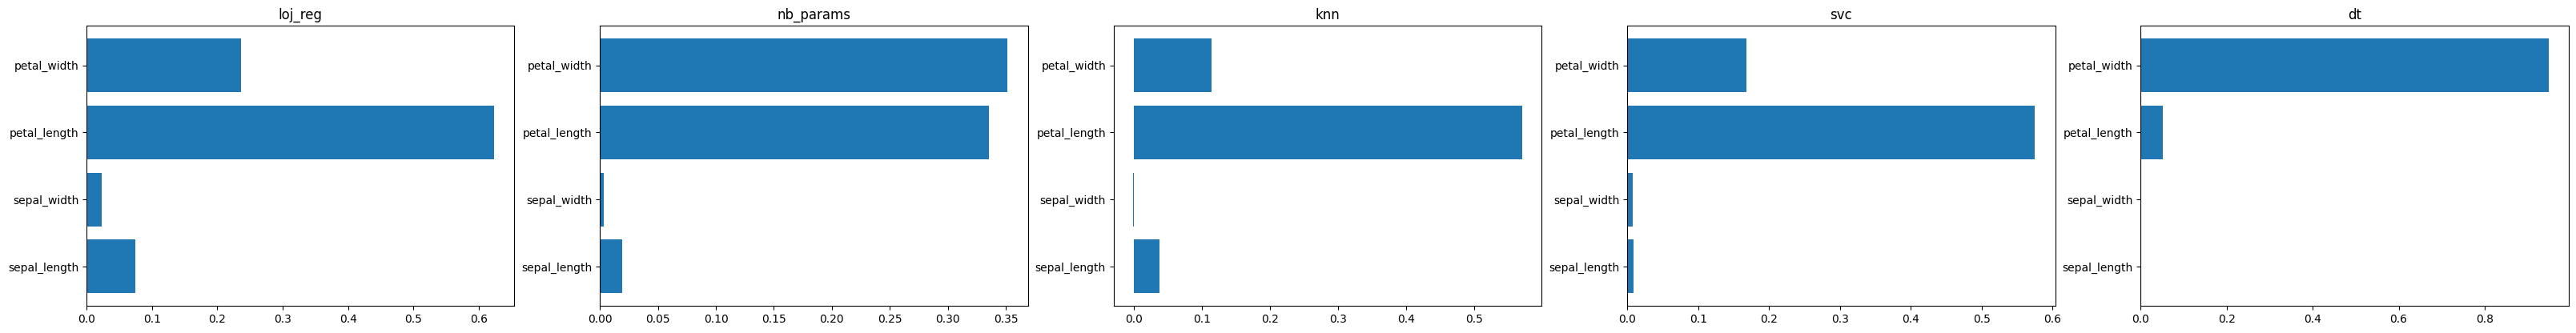

In [62]:
from sklearn.inspection import permutation_importance

size = len(non_lin_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//4+1, 4)

plt.figure(figsize=(cs*8, rs*5))
# plot feature importance for each model
for i, (name, model) in enumerate(non_lin_reg_models.items()):
    
    # Extracting the importance
    if hasattr(model, 'feature_importances_'):
        # for tree-based models
        importances = model.feature_importances_
    else:
        # for non-tree-based models
        result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=0)
        importances = result.importances_mean
    
    plt.subplot(rs,cs,i+1)
    plt.barh( X_train.columns, importances)
    plt.title(name)
    #plt.yticks(range(len(indices)), [f'feature {i+1}' for i in indices])
    #plt.xlabel('Relative Importance')


0.turn [loj_reg], plotting learning curve
1.turn [nb_params], plotting learning curve
2.turn [knn], plotting learning curve
3.turn [svc], plotting learning curve
4.turn [dt], plotting learning curve


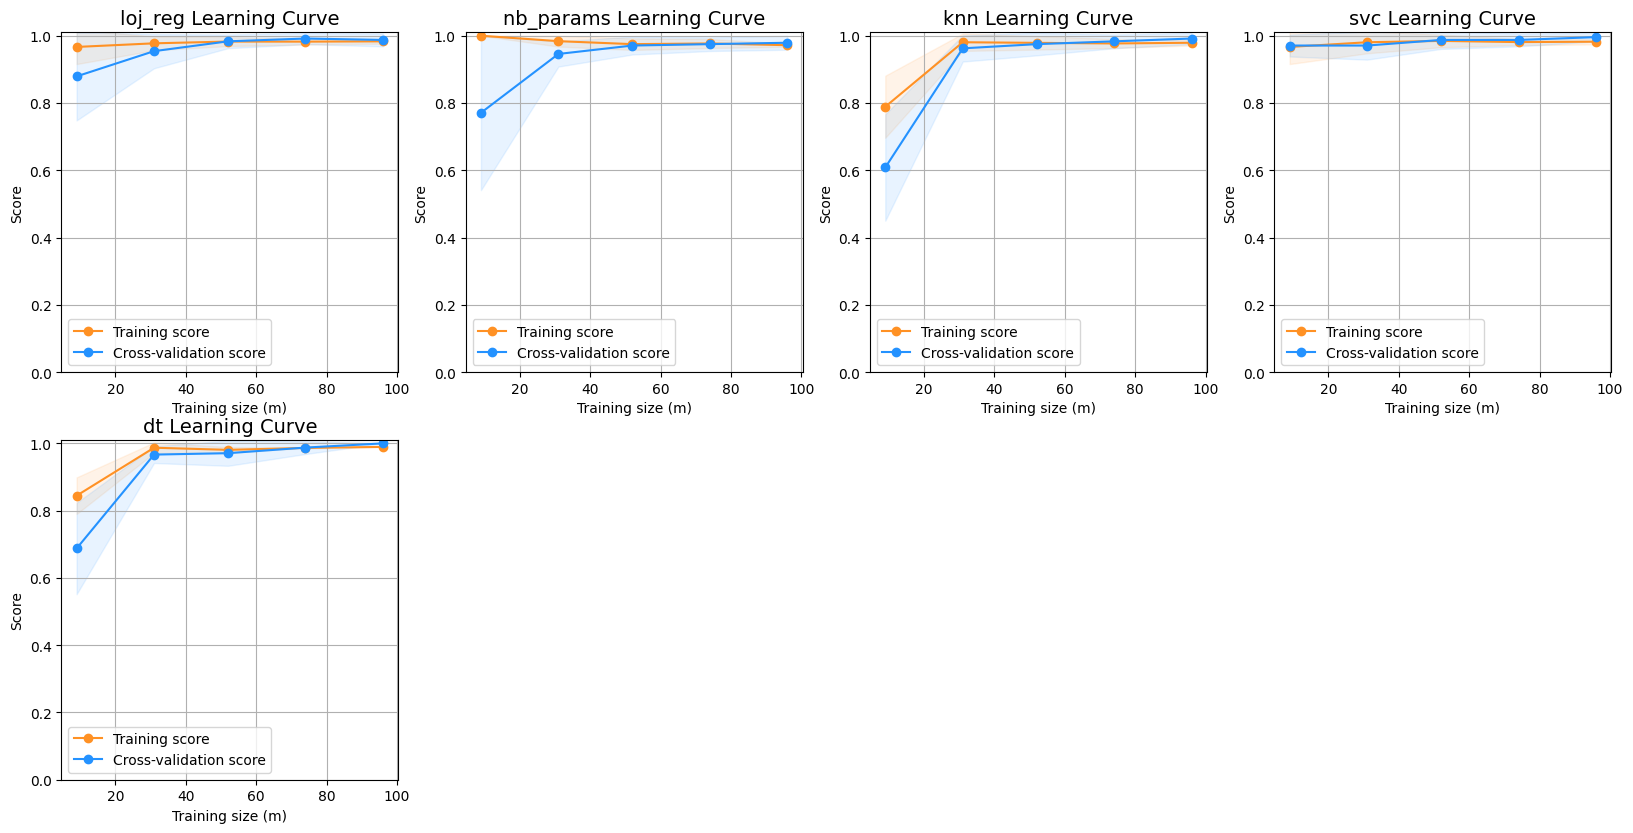

In [63]:
# Example Usage
model_size = len(non_lin_reg_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*5,rs*5),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(non_lin_reg_models, X_train, y_train,  **lcs_params)

## (3) Ensemble Models

#### Hyperparams

In [64]:
# Defining parameters
rf_params = {
    "n_estimators": [10, 50, 100, 200],
    "criterion": ["gini", "entropy"],
    #"max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    #"max_features": [None, "auto", "log2"],
    #"class_weight": [None, "balanced"],
    #"bootstrap": [True, False],
    #"oob_score": [True, False],
    #"n_jobs": [None, -1, 1]
}
from sklearn.ensemble import RandomForestClassifier
rf = [RandomForestClassifier(), rf_params] 

In [65]:
# Defining parameters
gbc_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    #'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'subsample': [0.7, 0.8, 0.9]
}
from sklearn.ensemble import GradientBoostingClassifier
gbc = [GradientBoostingClassifier(), gbc_params] 

In [66]:
# Defining parameters
xgbc_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    #'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 4],
    #'gamma': [0, 0.1, 0.2],
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'reg_alpha': [0, 1e-1, 1],
    #'reg_lambda': [0, 1e-1, 1]
}
from xgboost import XGBClassifier
xgbc = [XGBClassifier(), xgbc_params] 

In [67]:
# Defining parameters
lgbm_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    #'num_leaves': [31, 63, 127],
    #'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    #'min_child_weight': [1e-3, 1e-2, 1e-1],
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'reg_alpha': [0, 1e-1, 1],
    #'reg_lambda': [0, 1e-1, 1]
}
from lightgbm import LGBMClassifier
lgbm = [LGBMClassifier(), lgbm_params] 

In [68]:
!pip install catboost
import os
if os.system("pip freeze | grep catboost==") != 0: os.system("pip install catboost")

cb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    #'depth': [3, 5, 7],
    #'l2_leaf_reg': [1, 2, 4],
    #'boosting_type': ['Ordered', 'Plain', 'Pointwise'],
    #'colsample_bylevel': [0.7, 0.8, 0.9],
    #'reg_lambda': [0, 1e-1, 1] # or # 'l2_leaf_reg': [1, 2, 4]
}
from catboost import CatBoostClassifier
cb = [CatBoostClassifier(), cb_params] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.6 MB/s eta 0:00:00


In [69]:
ensemble_tuners = {
    "rf":rf,
    "gbc":gbc,
    "xgbc":xgbc,
    "lgbm":lgbm,
    "cb":cb
}

#### Tuning Demostration

In [70]:
ensemble_results, ensemble_metric_summary = tune_models(ensemble_tuners,  X_train, y_train, X_test , y_test, is_clf=True)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
0:	learn: 0.9742274	total: 46.7ms	remaining: 46.7s
1:	learn: 0.8730106	total: 47.9ms	

In [75]:
list(ensemble_results)

['rf', 'gbc', 'xgbc', 'lgbm', 'cb']

In [76]:
ensemble_metric_summary

accuracy precision recall f1_score  \
rf        0.9       0.9    0.9      0.9   
gbc       0.9       0.9    0.9      0.9   
xgbc      0.9       0.9    0.9      0.9   
lgbm      0.9       0.9    0.9      0.9   
cb        0.9       0.9    0.9      0.9   

                                             clf_report  
rf    {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
gbc   {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
xgbc  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
lgbm  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
cb    {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...

In [77]:
from pprint import pprint
pprint(ensemble_results)

{'cb': {'metric_results': {'accuracy': 0.9,
                           'clf_report': {'0': {'f1-score': 1.0,
                                                'precision': 1.0,
                                                'recall': 1.0,
                                                'support': 9},
                                          '1': {'f1-score': 0.8695652173913043,
                                                'precision': 0.8333333333333334,
                                                'recall': 0.9090909090909091,
                                                'support': 11},
                                          '2': {'f1-score': 0.8421052631578948,
                                                'precision': 0.8888888888888888,
                                                'recall': 0.8,
                                                'support': 10},
                                          'accuracy': 0.9,
                                          'macro 

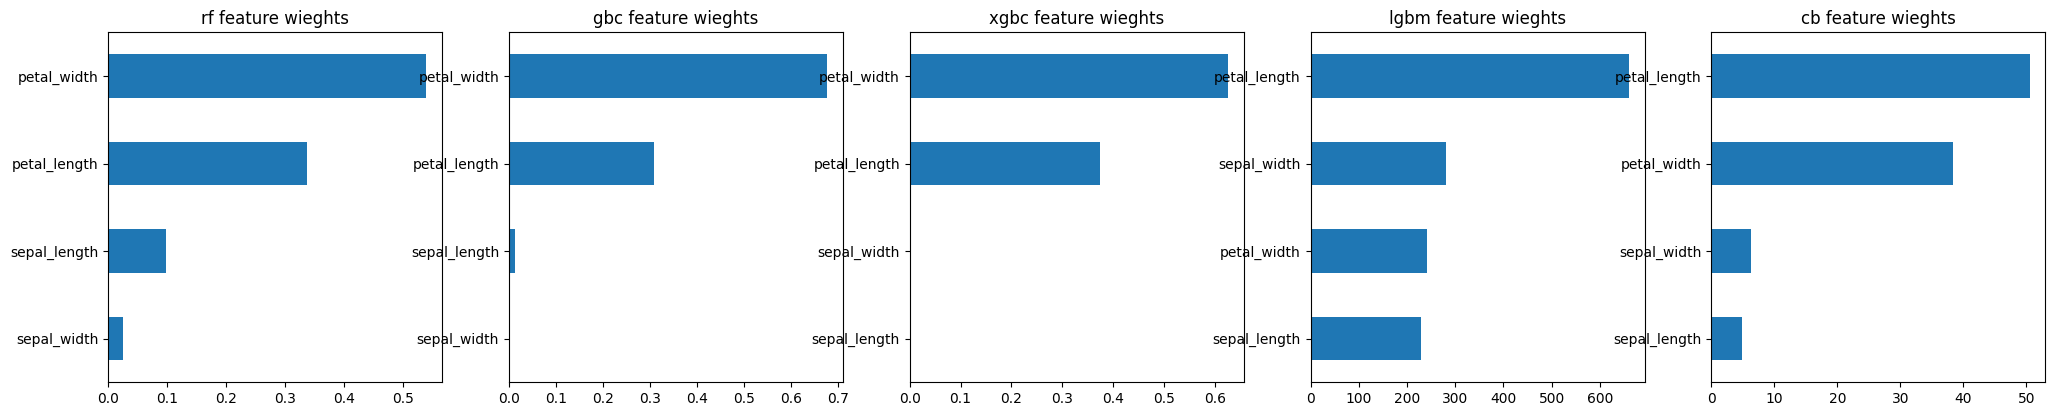

In [78]:
es_model_names = [col for col in ensemble_results.keys() if col not in ["bag_reg"]]
size = len(es_model_names)
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*5, rs*5))
ensemble_reg_models = dict()
for i, model_name in enumerate(es_model_names):
  if model_name in ["bag_reg"]: continue

  cur_model = ensemble_results[model_name]["tune_results"]["tuned_model"]
  ensemble_reg_models[model_name] = cur_model

  plt.subplot(rs,cs,i+1)
  pd.Series(cur_model.feature_importances_, X_train.columns).sort_values().plot(kind="barh")
  plt.title(f"{model_name} feature wieghts")

0.turn [rf], plotting learning curve
1.turn [gbc], plotting learning curve
2.turn [xgbc], plotting learning curve
3.turn [lgbm], plotting learning curve
4.turn [cb], plotting learning curve


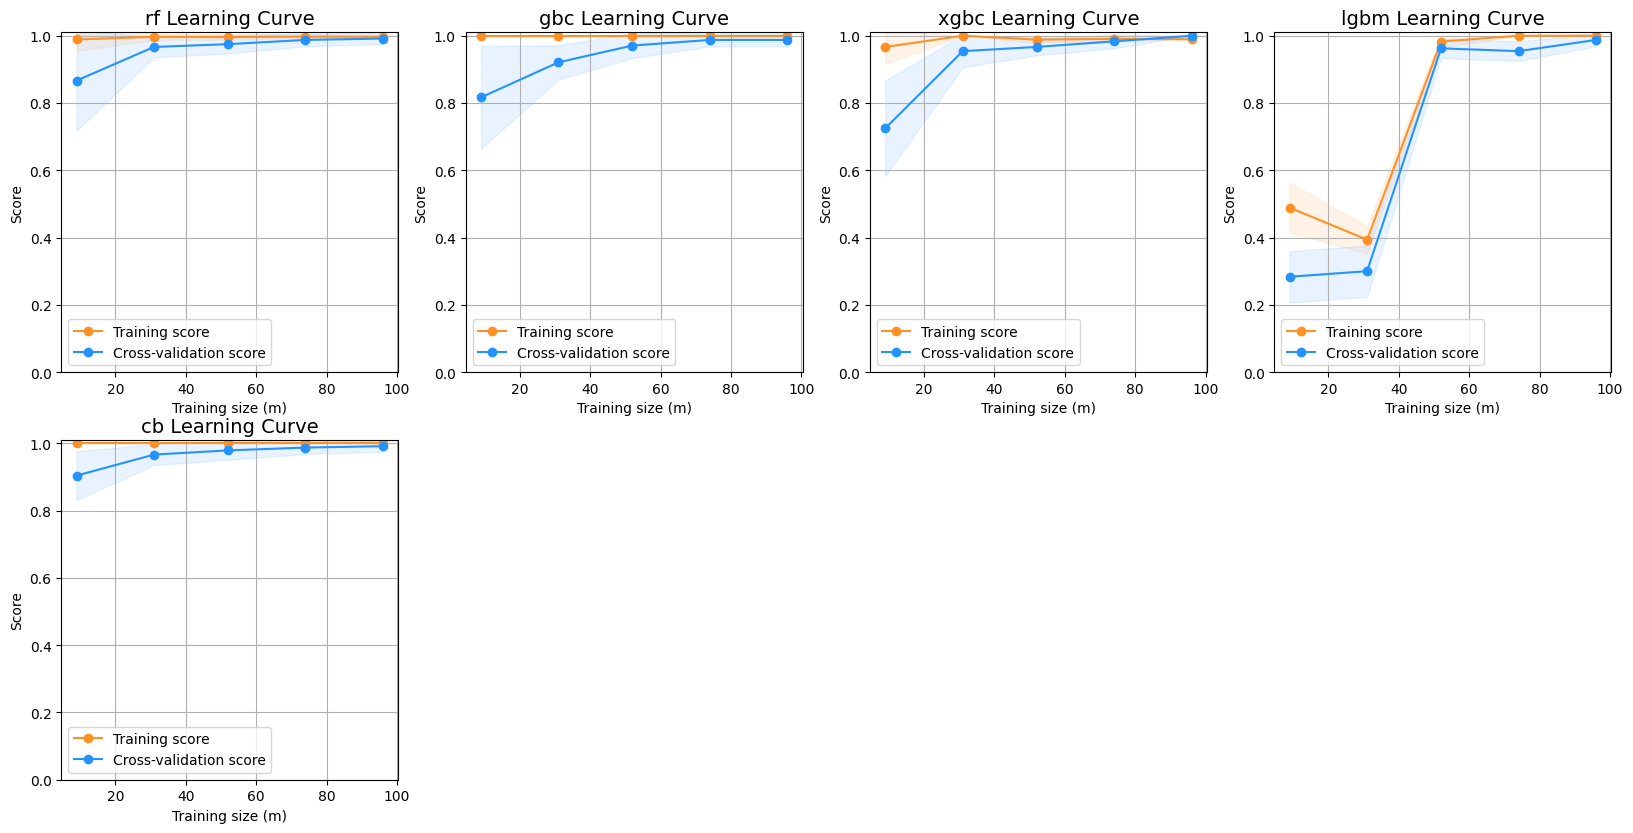

In [79]:
# Example Usage
model_size = len(ensemble_reg_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*5,rs*5),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(ensemble_reg_models, X_train, y_train,  **lcs_params)

## (4) Final Model

### Top models

In [80]:
# lin_results, lin_metric_summary
# lin_reg_results, lin_reg_metric_summary
# non_lin_results, non_lin_metric_summary
# ensemble_results, ensemble_metric_summary

In [81]:
all_results = [lin_results, lin_reg_results, non_lin_results, ensemble_results]

In [82]:
lin_models = pd.concat([lin_metric_summary, lin_reg_metric_summary])
lin_models = lin_models.sort_values(by=['MSE'], ascending=True)
lin_models

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError       MSE  \
lin_reg        1.0                0.0                     7.142857  0.066667   
l1_reg         1.0                0.0                     9.523810  0.100000   
enet_reg       1.0                0.0                     9.523810  0.100000   
l2_reg         1.0                0.0                    14.285714  0.133333   

              RMSE       MAE        R2  ExplainedVariance  
lin_reg   0.258199  0.066667  0.894552           0.894552  
l1_reg    0.316228  0.100000  0.841828           0.843585  
enet_reg  0.316228  0.100000  0.841828           0.843585  
l2_reg    0.365148  0.133333  0.789104           0.789104

In [83]:
non_linear_model = pd.concat([non_lin_metric_summary, ensemble_metric_summary])
non_linear_model = non_linear_model.sort_values(by=['accuracy','f1_score'],  ascending=False)
non_linear_model

accuracy precision    recall  f1_score  \
loj_reg    0.966667  0.966667  0.966667  0.966667   
knn        0.933333  0.933333  0.933333  0.933333   
svc        0.933333  0.933333  0.933333  0.933333   
nb_params       0.9       0.9       0.9       0.9   
dt              0.9       0.9       0.9       0.9   
rf              0.9       0.9       0.9       0.9   
gbc             0.9       0.9       0.9       0.9   
xgbc            0.9       0.9       0.9       0.9   
lgbm            0.9       0.9       0.9       0.9   
cb              0.9       0.9       0.9       0.9   

                                                  clf_report  
loj_reg    {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
knn        {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
svc        {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
nb_params  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
dt         {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
rf         {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
gbc        {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
xgbc       {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
lgbm       {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...  
cb         {'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...

In [84]:
non_linear_model.index

Index(['loj_reg', 'knn', 'svc', 'nb_params', 'dt', 'rf', 'gbc', 'xgbc', 'lgbm',
       'cb'],
      dtype='object')

### Final Model

### Greedy Selection

In [89]:
best_model_name = non_linear_model.iloc[0].name
best_model_name

'loj_reg'

In [90]:
tuned_model, best_params = None, None
for results in all_results:
  if best_model_name in results:
      tuned_model = results[best_model_name]["tune_results"]["tuned_model"]
      best_params = results[best_model_name]["tune_results"]["best_params"]

In [91]:
tuned_model.score(X_test, y_test)

0.9666666666666667

In [92]:
from sklearn.model_selection import cross_val_score
cross_val_score(tuned_model,X_test, y_test, cv=5).mean()

0.9333333333333333

# (F) Saving & Downloading the model

### Saving the model

In [93]:
import pickle
model_save_path = 'finalized_model.sav'
pickle.dump(tuned_model, open(model_save_path, 'wb'))

### Loading the model

In [94]:
loaded_model = pickle.load(open(model_save_path, 'rb'))

In [95]:
loaded_model.score(X_test, y_test)

0.9666666666666667

In [96]:
loaded_model.score(X_train, y_train)

0.9833333333333333

### Zipping the model
```python
import os 
zip_dst, src = f"{model_save_path}.zip", model_save_path
os.system(f"zip -r {zip_dst} {src}" )
```

### Downloading the model

In [142]:
from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["sepal_length"].min(), df["sepal_length"].max()

(4.3, 7.9)

In [ ]:
df["sepal_width"].min(), df["sepal_width"].max()

(2.0, 4.4)

In [ ]:
df["petal_length"].min(), df["petal_length"].max()

(1.0, 6.9)

In [ ]:
df["petal_width"].min(), df["petal_width"].max()

(0.1, 2.5)

# (G) Deployment as App

In [98]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

In [145]:
import pickle
import numpy as np

model_path = 'loj_reg.sav'
model = pickle.load(open(model_path, 'rb'))
classes = {
    0:'setosa',
    1:'versicolor',
    2:'virginica',
}

examples = [
    [5.1,	3.4, 1.5,	0.2],
    [6.1, 3. , 4.6, 1.4],
    [6.8, 3. , 5.5, 2.1],
    [4.4, 2.9, 1.4, 0.2],
    [5.8, 2.7, 3.9, 1.2],
    [6.1, 3. , 4.9, 1.8]
]

def predict(sepal_length, sepal_width, petal_length, petal_width):
    # preparing the input into convenient form
    features = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(-1,4)
    
    # prediction
    probs = model.predict_proba(features)[0]
    
    # adjusting the output
    class_probabilities = dict(zip(classes.values(), np.round(probs,3)))
    
    return class_probabilities

In [144]:
predict(*examples[0])

'virginica'

In [146]:
import gradio as gr

# input components
sepal_length = gr.inputs.Slider(minimum=0.1, maximum=10, default=5.1, label = 'sepal_length')
sepal_width = gr.inputs.Slider(minimum=1, maximum=10, default=3.5, label = 'sepal_width')
petal_length = gr.inputs.Slider(minimum=1, maximum=10, default=1.4	, label = 'petal_length')
petal_width = gr.inputs.Slider(minimum=1, maximum=5, default=0.2, label = 'petal_width')

# declerating the params
demo_params = {
    "fn":predict,
    "inputs":[sepal_length,sepal_width,petal_length,petal_width], 
    "outputs":"label",
    "examples":examples,
    "cache_examples":True
}

# Creating applicatio
gr.Interface(**demo_params).launch()

Caching examples at: '/content/gradio_cached_examples/51'
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>